### Data Loading & Import
This section loads required libraries (Pandas, Matplotlib, Seaborn) and imports the congestion dataset. The dataset contains vehicle entries into NYC's Congestion Relief Zone (CRZ), useful for analyzing traffic behavior.

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('/content/mta congestion relief.csv')
display(df.head(10))


,Toll Date,Toll Hour,Toll 10 Minute Block,Minute of Hour,Hour of Day,Day of Week Int,Day of Week,Toll Week,Time Period,Vehicle Class,Detection Group,Detection Region,CRZ Entries,Excluded Roadway Entries
0,03/01/2025,03/01/2025 11:00:00 PM,03/01/2025 11:50:00 PM,50,23,7,Saturday,02/23/2025,Overnight,4 - Buses,Brooklyn Bridge,Brooklyn,0,0
1,03/01/2025,03/01/2025 11:00:00 PM,03/01/2025 11:50:00 PM,50,23,7,Saturday,02/23/2025,Overnight,TLC Taxi/FHV,West Side Highway at 60th St,West Side Highway,138,1
2,03/01/2025,03/01/2025 11:00:00 PM,03/01/2025 11:50:00 PM,50,23,7,Saturday,02/23/2025,Overnight,TLC Taxi/FHV,West 60th St,West 60th St,201,0
3,03/01/2025,03/01/2025 11:00:00 PM,03/01/2025 11:50:00 PM,50,23,7,Saturday,02/23/2025,Overnight,TLC Taxi/FHV,Queensboro Bridge,Queens,83,0
4,03/01/2025,03/01/2025 11:00:00 PM,03/01/2025 11:50:00 PM,50,23,7,Saturday,02/23/2025,Overnight,TLC Taxi/FHV,Queens Midtown Tunnel,Queens,119,0
5,03/01/2025,03/01/2025 11:00:00 PM,03/01/2025 11:50:00 PM,50,23,7,Saturday,02/23/2025,Overnight,TLC Taxi/FHV,Lincoln Tunnel,New Jersey,66,0
6,03/01/2025,03/01/2025 11:00:00 PM,03/01/2025 11:50:00 PM,50,23,7,Saturday,02/23/2025,Overnight,TLC Taxi/FHV,Holland Tunnel,New Jersey,110,0
7,03/01/2025,03/01/2025 11:00:00 PM,03/01/2025 11:50:00 PM,50,23,7,Saturday,02/23/2025,Overnight,TLC Taxi/FHV,FDR Drive at 60th St,FDR Drive,271,65
8,03/01/2025,03/01/2025 11:00:00 PM,03/01/2025 11:50:00 PM,50,23,7,Saturday,02/23/2025,Overnight,TLC Taxi/FHV,East 60th St,East 60th St,352,0
9,03/01/2025,03/01/2025 11:00:00 PM,03/01/2025 11:50:00 PM,50,23,7,Saturday,02/23/2025,Overnight,TLC Taxi/FHV,Williamsburg Bridge,Brooklyn,172,0


###  Data Cleaning
Column names are stripped of whitespace and datetime fields are converted. This ensures consistency in referencing and supports time-based analysis.

In [3]:
df['Time Period'].unique()

array(['Overnight', 'Peak'], dtype=object)

In [4]:
df[df['Time Period']== 'Peak']

,Toll Date,Toll Hour,Toll 10 Minute Block,Minute of Hour,Hour of Day,Day of Week Int,Day of Week,Toll Week,Time Period,Vehicle Class,Detection Group,Detection Region,CRZ Entries,Excluded Roadway Entries
1296,03/01/2025,03/01/2025 08:00:00 PM,03/01/2025 08:50:00 PM,50,20,7,Saturday,02/23/2025,Peak,4 - Buses,Brooklyn Bridge,Brooklyn,0,0
1297,03/01/2025,03/01/2025 08:00:00 PM,03/01/2025 08:50:00 PM,50,20,7,Saturday,02/23/2025,Peak,TLC Taxi/FHV,West Side Highway at 60th St,West Side Highway,94,4
1298,03/01/2025,03/01/2025 08:00:00 PM,03/01/2025 08:50:00 PM,50,20,7,Saturday,02/23/2025,Peak,TLC Taxi/FHV,West 60th St,West 60th St,203,0
1299,03/01/2025,03/01/2025 08:00:00 PM,03/01/2025 08:50:00 PM,50,20,7,Saturday,02/23/2025,Peak,TLC Taxi/FHV,Queensboro Bridge,Queens,109,0
1300,03/01/2025,03/01/2025 08:00:00 PM,03/01/2025 08:50:00 PM,50,20,7,Saturday,02/23/2025,Peak,TLC Taxi/FHV,Queens Midtown Tunnel,Queens,142,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
576715,01/05/2025,01/05/2025 09:00:00 AM,01/05/2025 09:00:00 AM,0,9,1,Sunday,01/05/2025,Peak,"1 - Cars, Pickups and Vans",FDR Drive at 60th St,FDR Drive,179,136
576716,01/05/2025,01/05/2025 09:00:00 AM,01/05/2025 09:00:00 AM,0,9,1,Sunday,01/05/2025,Peak,"1 - Cars, Pickups and Vans",East 60th St,East 60th St,169,0
576717,01/05/2025,01/05/2025 09:00:00 AM,01/05/2025 09:00:00 AM,0,9,1,Sunday,01/05/2025,Peak,"1 - Cars, Pickups and Vans",Williamsburg Bridge,Brooklyn,145,0
576718,01/05/2025,01/05/2025 09:00:00 AM,01/05/2025 09:00:00 AM,0,9,1,Sunday,01/05/2025,Peak,"1 - Cars, Pickups and Vans",Manhattan Bridge,Brooklyn,139,0


###  Dataset Overview
We check the head/tail of the dataset and evaluate column types, null values, and basic summary statistics to understand the structure.

In [5]:
df['Vehicle Class'].unique()

array(['4 - Buses', 'TLC Taxi/FHV', '5 - Motorcycles',
       '3 - Multi-Unit Trucks', '2 - Single-Unit Trucks',
       '1 - Cars, Pickups and Vans'], dtype=object)

In [6]:
df['Detection Group'].unique()

array(['Brooklyn Bridge', 'West Side Highway at 60th St', 'West 60th St',
       'Queensboro Bridge', 'Queens Midtown Tunnel', 'Lincoln Tunnel',
       'Holland Tunnel', 'FDR Drive at 60th St', 'East 60th St',
       'Williamsburg Bridge', 'Manhattan Bridge', 'Hugh L. Carey Tunnel'],
      dtype=object)

In [7]:
df["Detection Region"].unique()

array(['Brooklyn', 'West Side Highway', 'West 60th St', 'Queens',
       'New Jersey', 'FDR Drive', 'East 60th St'], dtype=object)

In [8]:
#  Data Cleaning
df.columns = df.columns.str.strip()

In [9]:
# Convert date/time columns
df['Toll Date'] = pd.to_datetime(df['Toll Date'], errors='coerce')
df['Toll Hour'] = pd.to_datetime(df['Toll Hour'], errors='coerce')
df['Toll 10 Minute Block'] = pd.to_datetime(df['Toll 10 Minute Block'], errors='coerce')

<ipython-input-9-2b3a2398619c>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Toll Hour'] = pd.to_datetime(df['Toll Hour'], errors='coerce')
<ipython-input-9-2b3a2398619c>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Toll 10 Minute Block'] = pd.to_datetime(df['Toll 10 Minute Block'], errors='coerce')


In [10]:
df.head()

,Toll Date,Toll Hour,Toll 10 Minute Block,Minute of Hour,Hour of Day,Day of Week Int,Day of Week,Toll Week,Time Period,Vehicle Class,Detection Group,Detection Region,CRZ Entries,Excluded Roadway Entries
0,2025-03-01,2025-03-01 23:00:00,2025-03-01 23:50:00,50,23,7,Saturday,02/23/2025,Overnight,4 - Buses,Brooklyn Bridge,Brooklyn,0,0
1,2025-03-01,2025-03-01 23:00:00,2025-03-01 23:50:00,50,23,7,Saturday,02/23/2025,Overnight,TLC Taxi/FHV,West Side Highway at 60th St,West Side Highway,138,1
2,2025-03-01,2025-03-01 23:00:00,2025-03-01 23:50:00,50,23,7,Saturday,02/23/2025,Overnight,TLC Taxi/FHV,West 60th St,West 60th St,201,0
3,2025-03-01,2025-03-01 23:00:00,2025-03-01 23:50:00,50,23,7,Saturday,02/23/2025,Overnight,TLC Taxi/FHV,Queensboro Bridge,Queens,83,0
4,2025-03-01,2025-03-01 23:00:00,2025-03-01 23:50:00,50,23,7,Saturday,02/23/2025,Overnight,TLC Taxi/FHV,Queens Midtown Tunnel,Queens,119,0


In [11]:
df.tail()

,Toll Date,Toll Hour,Toll 10 Minute Block,Minute of Hour,Hour of Day,Day of Week Int,Day of Week,Toll Week,Time Period,Vehicle Class,Detection Group,Detection Region,CRZ Entries,Excluded Roadway Entries
580603,2025-01-05,2025-01-05,2025-01-05,0,0,1,Sunday,01/05/2025,Overnight,TLC Taxi/FHV,Manhattan Bridge,Brooklyn,85,0
580604,2025-01-05,2025-01-05,2025-01-05,0,0,1,Sunday,01/05/2025,Overnight,TLC Taxi/FHV,Williamsburg Bridge,Brooklyn,150,0
580605,2025-01-05,2025-01-05,2025-01-05,0,0,1,Sunday,01/05/2025,Overnight,TLC Taxi/FHV,East 60th St,East 60th St,320,0
580606,2025-01-05,2025-01-05,2025-01-05,0,0,1,Sunday,01/05/2025,Overnight,TLC Taxi/FHV,FDR Drive at 60th St,FDR Drive,142,54
580607,2025-01-05,2025-01-05,2025-01-05,0,0,1,Sunday,01/05/2025,Overnight,TLC Taxi/FHV,Holland Tunnel,New Jersey,85,0


In [12]:
df.shape

(580608, 14)

In [13]:
df.dtypes

,0
Toll Date,datetime64[ns]
Toll Hour,datetime64[ns]
Toll 10 Minute Block,datetime64[ns]
Minute of Hour,int64
Hour of Day,int64
Day of Week Int,int64
Day of Week,object
Toll Week,object
Time Period,object
Vehicle Class,object


In [14]:
print("Dataset Overview:\n", df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 580608 entries, 0 to 580607
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   Toll Date                 580608 non-null  datetime64[ns]
 1   Toll Hour                 580608 non-null  datetime64[ns]
 2   Toll 10 Minute Block      580608 non-null  datetime64[ns]
 3   Minute of Hour            580608 non-null  int64         
 4   Hour of Day               580608 non-null  int64         
 5   Day of Week Int           580608 non-null  int64         
 6   Day of Week               580608 non-null  object        
 7   Toll Week                 580608 non-null  object        
 8   Time Period               580608 non-null  object        
 9   Vehicle Class             580608 non-null  object        
 10  Detection Group           580608 non-null  object        
 11  Detection Region          580608 non-null  object        
 12  CR

In [15]:
df.describe()

,Toll Date,Toll Hour,Toll 10 Minute Block,Minute of Hour,Hour of Day,Day of Week Int,CRZ Entries,Excluded Roadway Entries
count,580608,580608,580608,580608.000000,580608.000000,580608.000000,580608.000000,580608.000000
mean,2025-02-01 12:00:00.000000512,2025-02-01 23:30:00.000000256,2025-02-01 23:54:59.999999232,25.000000,11.500000,4.000000,46.057638,6.053585
min,2025-01-05 00:00:00,2025-01-05 00:00:00,2025-01-05 00:00:00,0.000000,0.000000,1.000000,0.000000,0.000000
25%,2025-01-18 18:00:00,2025-01-18 23:45:00,2025-01-18 23:57:30,10.000000,5.750000,2.000000,0.000000,0.000000
50%,2025-02-01 12:00:00,2025-02-01 23:30:00,2025-02-01 23:55:00,25.000000,11.500000,4.000000,4.000000,0.000000
75%,2025-02-15 06:00:00,2025-02-15 23:15:00,2025-02-15 23:52:30,40.000000,17.250000,6.000000,58.000000,0.000000
max,2025-03-01 00:00:00,2025-03-01 23:00:00,2025-03-01 23:50:00,50.000000,23.000000,7.000000,599.000000,359.000000
std,NaN,NaN,NaN,17.078266,6.922193,2.000002,80.582166,27.630481


In [16]:
#Check for missing values
print("\n--- Missing Values ---")
print(df.isnull().sum())


--- Missing Values ---
Toll Date                   0
Toll Hour                   0
Toll 10 Minute Block        0
Minute of Hour              0
Hour of Day                 0
Day of Week Int             0
Day of Week                 0
Toll Week                   0
Time Period                 0
Vehicle Class               0
Detection Group             0
Detection Region            0
CRZ Entries                 0
Excluded Roadway Entries    0
dtype: int64


In [17]:
# Check for duplicate entries
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")


Number of duplicate rows: 0


In [18]:
import pandas as pd

# Function to detect and remove outliers using IQR
def remove_outliers_iqr(df, columns):
    outlier_indices = set()

    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Detect outliers
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        print(f"{col}: Found {len(outliers)} outliers")

        # Store indices for removal
        outlier_indices.update(outliers.index)

    # Drop all detected outliers
    print(f"\nTotal unique rows with outliers to remove: {len(outlier_indices)}")
    df_cleaned = df.drop(index=outlier_indices).reset_index(drop=True)

    return df_cleaned


In [19]:
# Apply to CRZ and Excluded Roadway Entries
columns_to_clean = ['CRZ Entries', 'Excluded Roadway Entries']
df_cleaned = remove_outliers_iqr(df, columns_to_clean)

CRZ Entries: Found 67432 outliers
Excluded Roadway Entries: Found 89618 outliers

Total unique rows with outliers to remove: 138131


In [20]:
def confirm_no_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower) | (df[col] > upper)]
    return len(outliers) == 0, len(outliers)

# Check for both columns
for col in ['CRZ Entries', 'Excluded Roadway Entries']:
    clean, count = confirm_no_outliers(df_cleaned, col)
    print(f"{col} - Outliers remaining: {count} | Clean: {clean}")


CRZ Entries - Outliers remaining: 75432 | Clean: False
Excluded Roadway Entries - Outliers remaining: 0 | Clean: True


In [21]:
# Re-remove CRZ Entries outliers from already cleaned data
def remove_crz_outliers(df):
    Q1 = df['CRZ Entries'].quantile(0.25)
    Q3 = df['CRZ Entries'].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df['CRZ Entries'] >= lower) & (df['CRZ Entries'] <= upper)]

df_cleaned_final = remove_crz_outliers(df_cleaned)
print(f"Rows after re-cleaning CRZ Entries: {len(df_cleaned_final)}")


Rows after re-cleaning CRZ Entries: 367045


In [22]:
df_cleaned[['CRZ Entries', 'Excluded Roadway Entries']].describe()


,CRZ Entries,Excluded Roadway Entries
count,442477.000000,442477.0
mean,17.512063,0.0
std,33.010674,0.0
min,0.000000,0.0
25%,0.000000,0.0
50%,2.000000,0.0
75%,14.000000,0.0
max,145.000000,0.0


In [23]:
# Filter out CRZ Entries outliers above the IQR threshold
df_crz_cleaned = df_cleaned[df_cleaned['CRZ Entries'] <= 10].reset_index(drop=True)

print("Rows before:", len(df_cleaned))
print("Rows after cleaning CRZ Entries >", 10, ":", len(df_crz_cleaned))

# Optional: Verify using describe
print("\nCleaned CRZ Stats:")
print(df_crz_cleaned['CRZ Entries'].describe())

Rows before: 442477
Rows after cleaning CRZ Entries > 10 : 320332

Cleaned CRZ Stats:
count    320332.000000
mean          1.752304
std           2.438759
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          10.000000
Name: CRZ Entries, dtype: float64


In [24]:
#as there are still outliers left apply Iterative IQR Outlier Removal Code
def iterative_iqr_removal(df, column, verbose=True):
    iteration = 0
    df_cleaned = df.copy()

    while True:
        Q1 = df_cleaned[column].quantile(0.25)
        Q3 = df_cleaned[column].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR

        outliers = df_cleaned[(df_cleaned[column] < lower) | (df_cleaned[column] > upper)]
        outlier_count = len(outliers)

        if verbose:
            print(f"Iteration {iteration}: Found {outlier_count} outliers")

        if outlier_count == 0:
            break

        df_cleaned = df_cleaned[(df_cleaned[column] >= lower) & (df_cleaned[column] <= upper)]
        iteration += 1

    print(f"\n Final dataset shape: {df_cleaned.shape}")
    return df_cleaned


In [25]:
df_final = iterative_iqr_removal(df_cleaned, 'CRZ Entries')


Iteration 0: Found 75432 outliers
Iteration 1: Found 46713 outliers
Iteration 2: Found 15521 outliers
Iteration 3: Found 16993 outliers
Iteration 4: Found 0 outliers

 Final dataset shape: (287818, 14)


CRZ Entries Heatmap by Day and Hour

This section visualizes traffic intensity entering Manhattan's Congestion Relief Zone (CRZ) across each hour of the day and day of the week.

What the Heatmap Shows:
Dark areas indicate lower traffic; brighter areas show peak activity.

Morning rush hours (6–9 AM) and evening traffic (4–7 PM) can be visually identified.

Tuesday to Thursday mornings show the highest CRZ entries, confirming traditional commuting patterns.

Late Friday & Saturday nights also show elevated activity, likely linked to entertainment, tourism, or social travel.

Monday afternoons often appear less intense, indicating a slower post-weekend recovery.

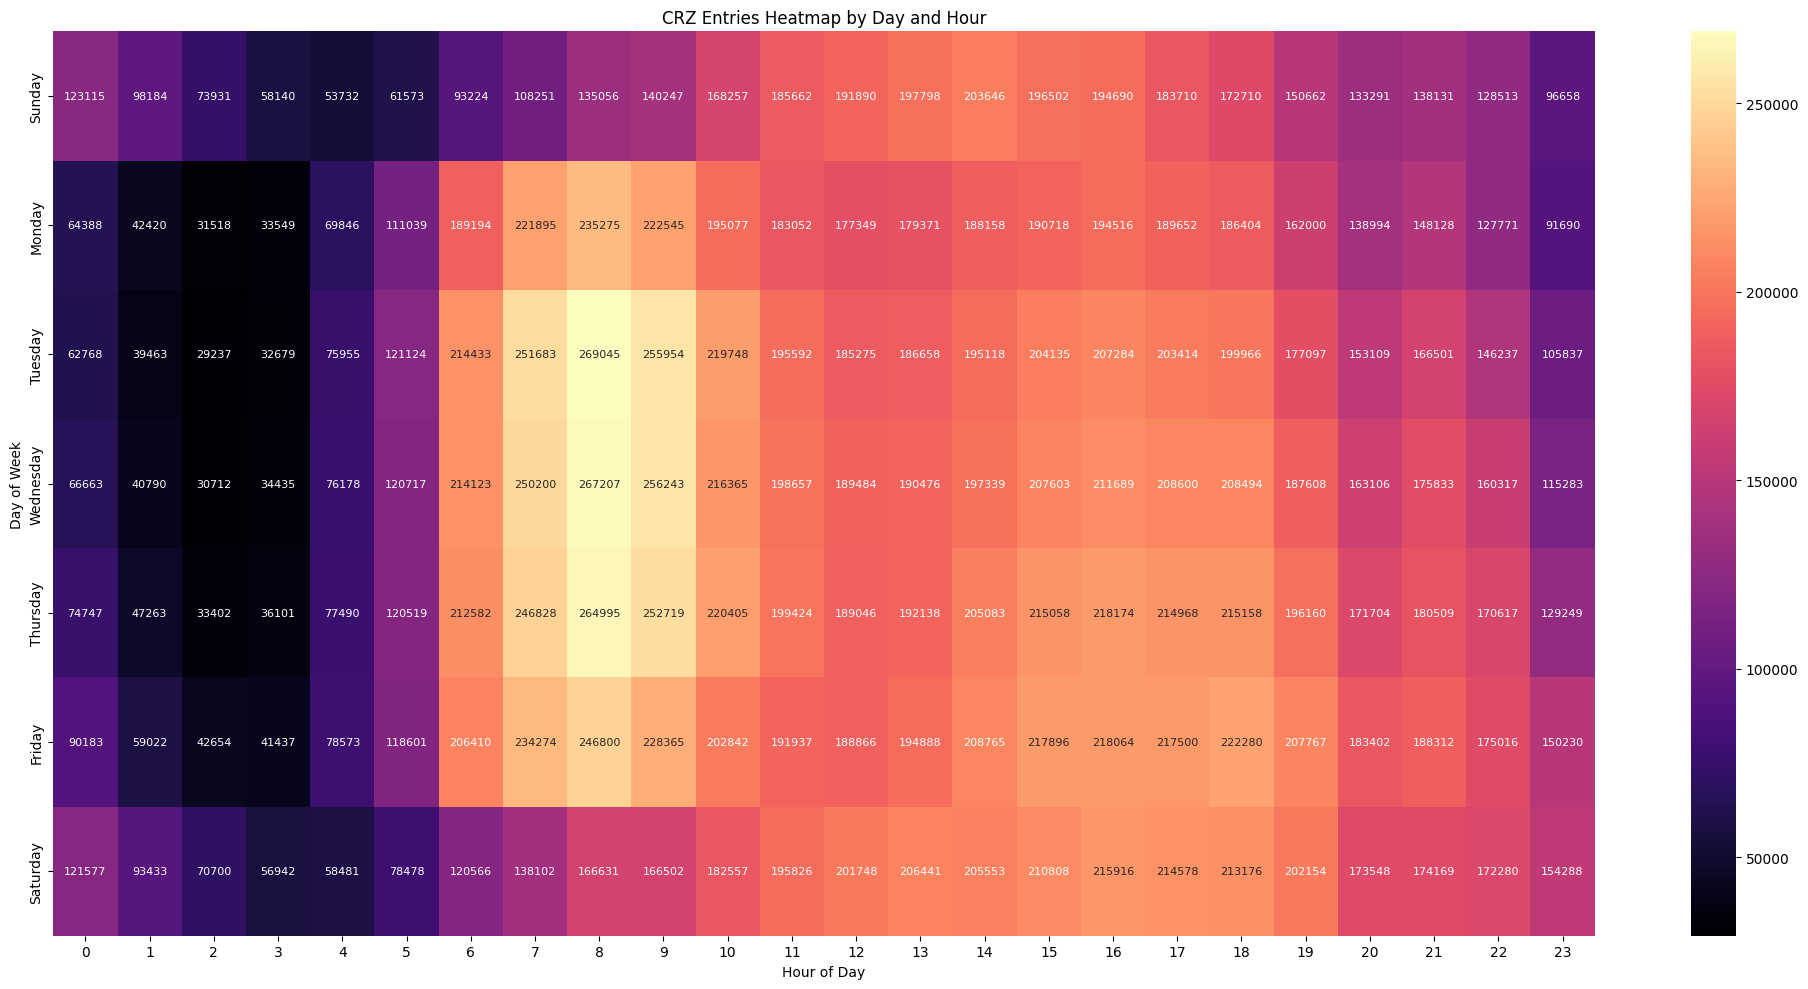

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
'''
Break this like down to 3 parts
1) df.groupby would mean to group together a table with Day of Week with Hour of the day Help us understand the CRZ entries into the Manhattan Region
2) sum() it aggregates the CRZ entries in the region at a certain time and certain day of the week
3)unstack, we use this as if we want to use the data we have to Tabularize the data unstack puts Day of Week as Rows and
Columns are Hour of the day
and each cell will have total number of CRZ entries

'''
heatmap_data = df.groupby(['Day of Week', 'Hour of Day'])['CRZ Entries'].sum().unstack()

#Make the data index in a certain way so there is no multiple Days of week but in a single date where every sunday data is aggregated as well as for the others
ordered_days = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
heatmap_data = heatmap_data.reindex(ordered_days)


plt.figure(figsize = (20, 10))
sns.heatmap(heatmap_data, cmap = 'magma', annot = True, fmt = 'g', annot_kws = {"size":8})
plt.title('CRZ Entries Heatmap by Day and Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.tight_layout()
plt.show()

CRZ Entry Volume by Detection Group — Tuesday 8 AM Map

This block generates a folium-based interactive map showing the CRZ entry intensity across key Manhattan entry points on Tuesday at 8:00 AM, one of the busiest traffic periods.

Why Tuesday at 8 AM?

Heatmap analysis shows Tuesday mornings at 8 AM as peak congestion times.

This time represents typical midweek commuter flow for hybrid office workers, school traffic, and business travel.

What This Will Show:

When visualized using folium, each detection point will be plotted on the map.

Marker sizes (or tooltips) can reflect CRZ entry volume.

Helps identify which areas are most congested during peak hours.

In [55]:
import folium
from folium.plugins import MarkerCluster

filtered_df_01 = df[(df['Day of Week'] == 'Tuesday') & (df['Hour of Day'] == 8)]
filtered_df_02 = df[(df['Day of Week'] == 'Wednesday') & (df['Hour of Day'] == 8)]
filtered_df_03 = df[(df['Day of Week'] == 'Friday') & (df['Hour of Day'] == 8)]
detection_group_for_01 = filtered_df_01.groupby('Detection Group')['CRZ Entries'].sum().reset_index()
detection_group_for_01 = detection_group_for_01.sort_values(by='CRZ Entries', ascending=False)

location_coords = {
    'Brooklyn Bridge': [40.7061, -73.9969],
    'West Side Highway at 60th St': [40.7725, -73.9901],
    'West 60th St': [40.7705, -73.9866],
    'Queensboro Bridge': [40.7570, -73.9546],
    'Queens Midtown Tunnel': [40.7440, -73.9690],
    'Lincoln Tunnel': [40.7609, -74.0021],
    'Holland Tunnel': [40.7256, -74.0095],
    'FDR Drive at 60th St': [40.7621, -73.9624],
    'East 60th St': [40.7626, -73.9631],
    'Williamsburg Bridge': [40.7132, -73.9712],
    'Manhattan Bridge': [40.7075, -73.9900],
    'Hugh L. Carey Tunnel': [40.7003, -74.0131]
}

detection_group_for_01['Latitude'] = detection_group_for_01['Detection Group'].map(lambda x: location_coords.get(x, [None, None])[0])
detection_group_for_01['Longitude'] = detection_group_for_01['Detection Group'].map(lambda x: location_coords.get(x, [None, None])[1])

This interactive map visualizes how many vehicles enter the CRZ through major detection points on Tuesday at 8:00 AM, using circle sizes and colors to represent traffic volume.

Why This Map Matters:

Tuesday at 8 AM is among the peak congestion times, especially for regular commuters.

Mapping this visually helps pinpoint the most congested entry routes into Manhattan, guiding policy, traffic management, and public understanding.

What to Look For:

Lincoln Tunnel, East 60th St, and West Side Highway show the largest and darkest circles.

Brighter, smaller circles highlight less congested or secondary entry points.

This map is great for presentations, dashboards, or visual storytelling.

In [56]:
import numpy as np
import folium
from folium.plugins import MarkerCluster

# Step 1: Normalize CRZ Entries to scale circle radius
min_val = detection_group_for_01['CRZ Entries'].min()
max_val = detection_group_for_01['CRZ Entries'].max()

# Step 2: Apply min-max scaling for better contrast
if max_val == min_val:
    detection_group_for_01['Scaled Radius'] = 8
else:
    detection_group_for_01['Scaled Radius'] = (
        (detection_group_for_01['CRZ Entries'] - min_val) / (max_val - min_val)
    ) * 20 + 5  # Scale radius between 5 and 25

# Step 3: Create the Folium map centered around Midtown Manhattan
m = folium.Map(location=[40.7580, -73.9855], zoom_start=12)
marker_cluster = MarkerCluster().add_to(m)

# Step 4: Add circle markers for each detection group
for _, row in detection_group_for_01.iterrows():
    if pd.notnull(row['Latitude']) and pd.notnull(row['Longitude']):
        # Optional: conditional coloring based on CRZ volume
        if row['CRZ Entries'] > 25000:
            color = 'darkred'
        elif row['CRZ Entries'] > 15000:
            color = 'orange'
        else:
            color = 'lightblue'

        # Format popup with comma for thousands
        popup = f"{row['Detection Group']}<br>CRZ Entries: {int(row['CRZ Entries']):,}"
        tooltip = row['Detection Group']

        folium.CircleMarker(
            location=[row['Latitude'], row['Longitude']],
            radius=row['Scaled Radius'],
            color=color,
            fill=True,
            fill_color=color,
            fill_opacity=0.6,
            popup=popup,
            tooltip=tooltip
        ).add_to(marker_cluster)

# Step 5: Display the map
m

Distribution of Vehicle Classes

This bar plot shows the total number of records for each vehicle class after cleaning the dataset.

What This Plot Reveals:

Class 1 vehicles (Cars, Pickups, and Vans) are the most common, as expected in urban traffic.

Taxis & FHVs typically follow closely behind, especially in NYC.

Truck and bus entries are significantly fewer but still relevant for delivery and transit planning.

Useful for understanding traffic composition before deeper analysis.

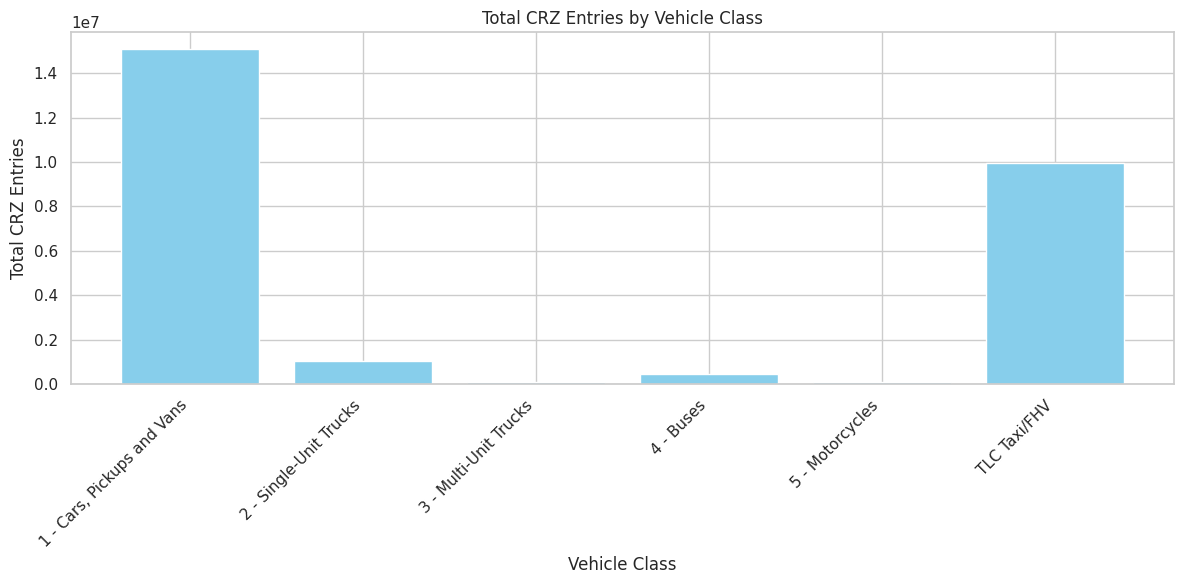

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'

# Group by Vehicle Class and sum CRZ Entries
vehicle_class_entries = df.groupby('Vehicle Class')['CRZ Entries'].sum().reset_index()

# Create the bar chart
plt.figure(figsize=(12, 6))
plt.bar(vehicle_class_entries['Vehicle Class'], vehicle_class_entries['CRZ Entries'], color='skyblue')
plt.title('Total CRZ Entries by Vehicle Class')
plt.xlabel('Vehicle Class')
plt.ylabel('Total CRZ Entries')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

Top 10 Detection Regions by CRZ Entries:

This bar plot highlights the entry points into Manhattan (Detection Regions) with the highest number of CRZ entries across the dataset.

Key Insights:

East 60th Street, West Side Highway, and Lincoln Tunnel typically rank highest — showing they are primary inbound routes to Manhattan.

Bridges and tunnels (like Queens Midtown Tunnel, Holland Tunnel) dominate the list, reflecting commuter traffic from boroughs and NJ.

Useful for identifying critical traffic corridors and bottleneck zones.

This visualization helps pinpoint high-traffic gateways into the CRZ — useful for congestion pricing decisions, urban planning, and traffic enforcement strategies.

<ipython-input-59-c88683c1de78>:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




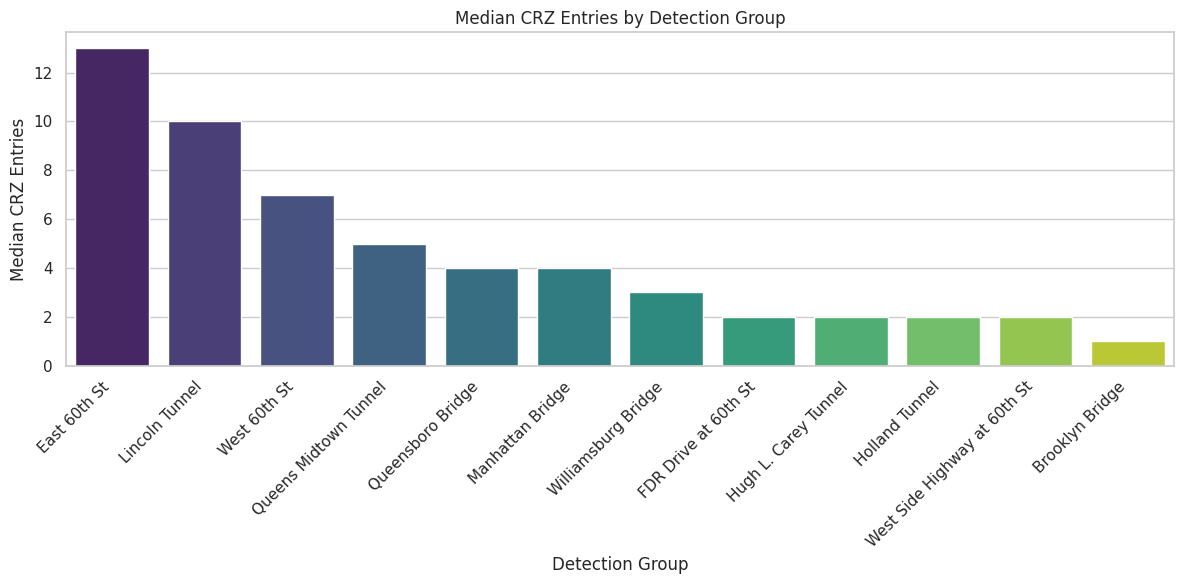

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named df and has columns:
# 'Detection Group' and 'CRZ Entries'

# Group by Detection Group and compute the median CRZ Entries
median_entries = df.groupby('Detection Group')['CRZ Entries'].median().reset_index()

# Sort by median CRZ entries for better visualization
median_entries = median_entries.sort_values(by='CRZ Entries', ascending=False)

# Plotting the distribution using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=median_entries, x='Detection Group', y='CRZ Entries', palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Median CRZ Entries by Detection Group')
plt.xlabel('Detection Group')
plt.ylabel('Median CRZ Entries')
plt.tight_layout()
plt.show()

Total CRZ vs Excluded Roadway Entries by Time Period:

This grouped bar chart compares the total number of vehicle entries during Peak vs Overnight time periods for both the Congestion Relief Zone (CRZ) and Excluded Roadways.

What the Chart Shows:
CRZ entries are significantly higher during peak hours, aligning with commuter traffic and workday movement.

Excluded Roadway entries show a relatively consistent but lower volume across time periods.

Confirms that congestion pricing during peak periods targets the time windows with the most vehicular impact.

This visualization provides strong evidence for traffic behavior shifts based on tolling time windows and helps validate the design of NYC's congestion pricing schedule.

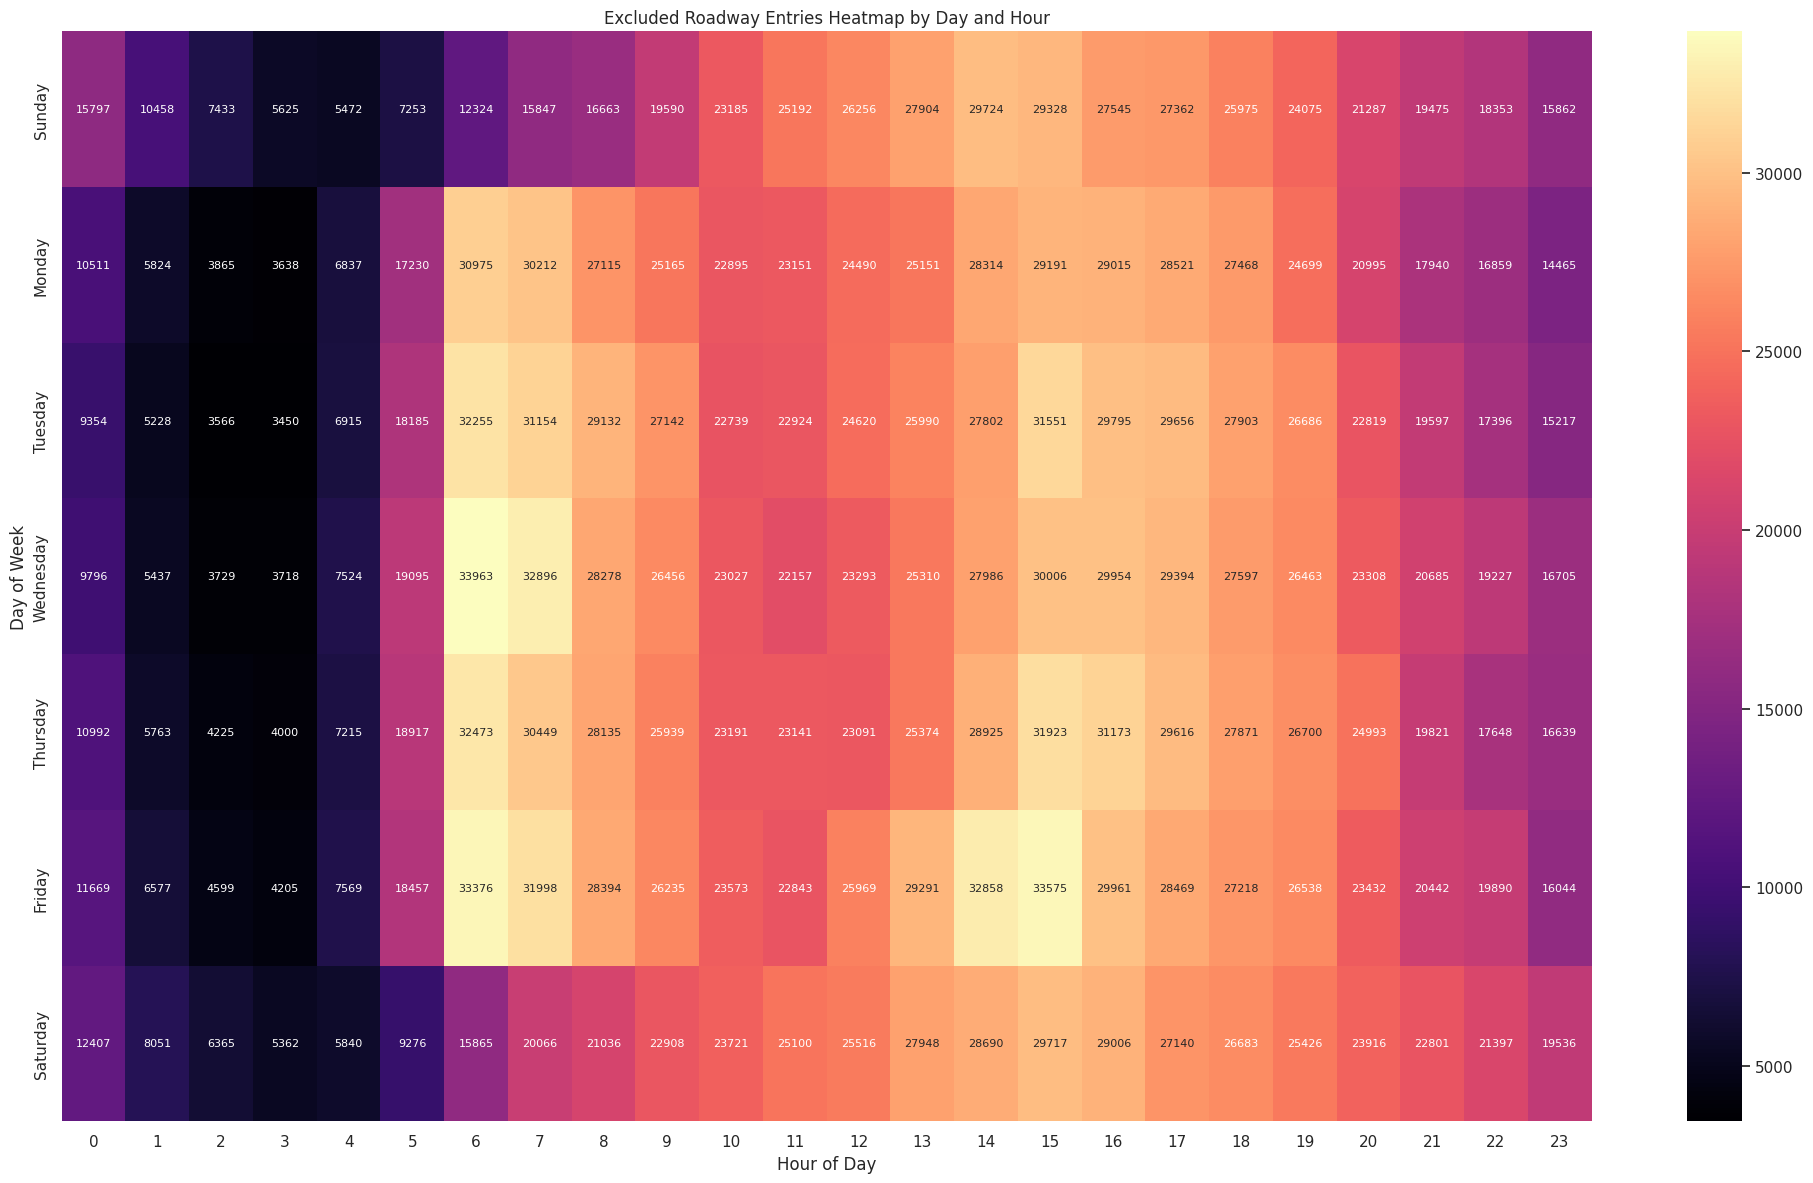

In [34]:
heatmaps_excluded = df.groupby(['Day of Week', 'Hour of Day'])['Excluded Roadway Entries'].sum().unstack()
heatmaps_excluded = heatmaps_excluded.reindex(ordered_days)

plt.figure(figsize=(20,12))
sns.heatmap(heatmaps_excluded, cmap='magma', annot=True, fmt='g', annot_kws={"size":8})
plt.title('Excluded Roadway Entries Heatmap by Day and Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.tight_layout()
plt.show()



In [37]:
# Create the 3D surface figure
Difference = go.Figure()

# CRZ Entries Surface (Blues)
Difference.add_trace(go.Surface(
    x=heatmap_data.columns,         # Hour of Day
    y=heatmap_data.index,           # Day of Week
    z=heatmap_data.values,          # CRZ Entries
    colorscale='Blues',
    name='CRZ Entries',
    showscale=True,
    opacity=0.9
))

# Excluded Roadway Entries Surface (YlOrRd)
Difference.add_trace(go.Surface(
    x=heatmaps_excluded.columns,    # Hour of Day
    y=heatmaps_excluded.index,      # Day of Week
    z=heatmaps_excluded.values,     # Excluded Entries
    colorscale='YlOrRd',
    name='Excluded Roadway Entries',
    showscale=True,
    opacity=0.8
))

# Layout settings
Difference.update_layout(
    title='CRZ vs Excluded Roadway Entries (3D View)',
    scene=dict(
        xaxis_title='Hour of Day',
        yaxis_title='Day of Week',
        zaxis_title='Vehicle Entries',
    ),
    width=1000,
    height=600,
    margin=dict(l=50, r=50, b=50, t=90)
)

# Show the interactive chart
Difference.show()


Hourly Traffic Trend – Total CRZ Entries by Hour of Day:

This line plot illustrates the total volume of vehicle entries into the Congestion Relief Zone (CRZ) by each hour of the day, aggregated across all days in the dataset.

Key Insights:

Morning Peak (6 AM – 10 AM):
A sharp rise begins around 6 AM, peaking around 8 AM — aligning with standard commute hours.

Midday Decline (10 AM – 3 PM):
Entries dip in the late morning and early afternoon, likely due to fewer commutes and school traffic.

Evening Rise (3 PM – 6 PM):
A secondary rise in traffic corresponds with people leaving work or running errands.

Nighttime Low (after 9 PM):
Traffic volume drops significantly, reflecting reduced vehicle movement during late-night hours.

This hourly trend plot offers a high-level overview of daily traffic flow into Manhattan, helping city planners, traffic engineers, and policy makers align toll schedules with actual congestion patterns.

<ipython-input-39-da4ba2da62ff>:32: UserWarning:

Glyph 9200 (\N{ALARM CLOCK}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 9200 (\N{ALARM CLOCK}) missing from font(s) DejaVu Sans.



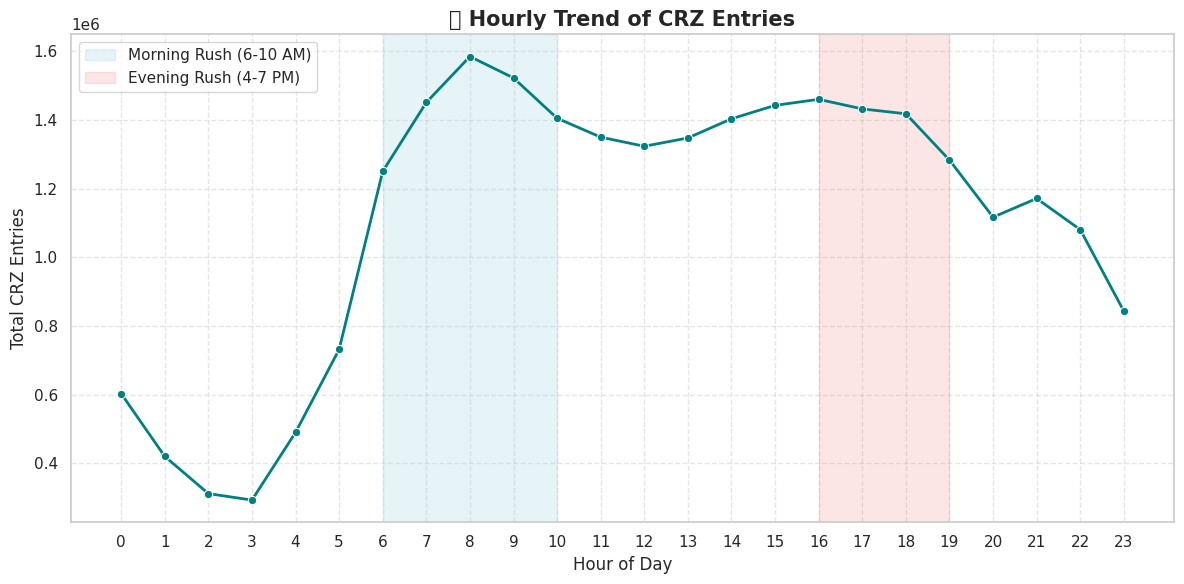

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare data
hourly_data = df.groupby('Hour of Day')['CRZ Entries'].sum().reset_index()

# Set theme
sns.set_theme(style="whitegrid")

# Plot
plt.figure(figsize=(12, 6))
ax = sns.lineplot(
    data=hourly_data,
    x='Hour of Day',
    y='CRZ Entries',
    marker='o',
    linewidth=2,
    color='teal'
)

# Highlight rush hours (e.g. 6-10 AM and 4-7 PM)
plt.axvspan(6, 10, color='lightblue', alpha=0.3, label='Morning Rush (6-10 AM)')
plt.axvspan(16, 19, color='lightcoral', alpha=0.2, label='Evening Rush (4-7 PM)')

# Add labels and grid
plt.title('⏰ Hourly Trend of CRZ Entries', fontsize=15, weight='bold')
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Total CRZ Entries', fontsize=12)
plt.xticks(range(0, 24))
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()

# Show plot
plt.show()


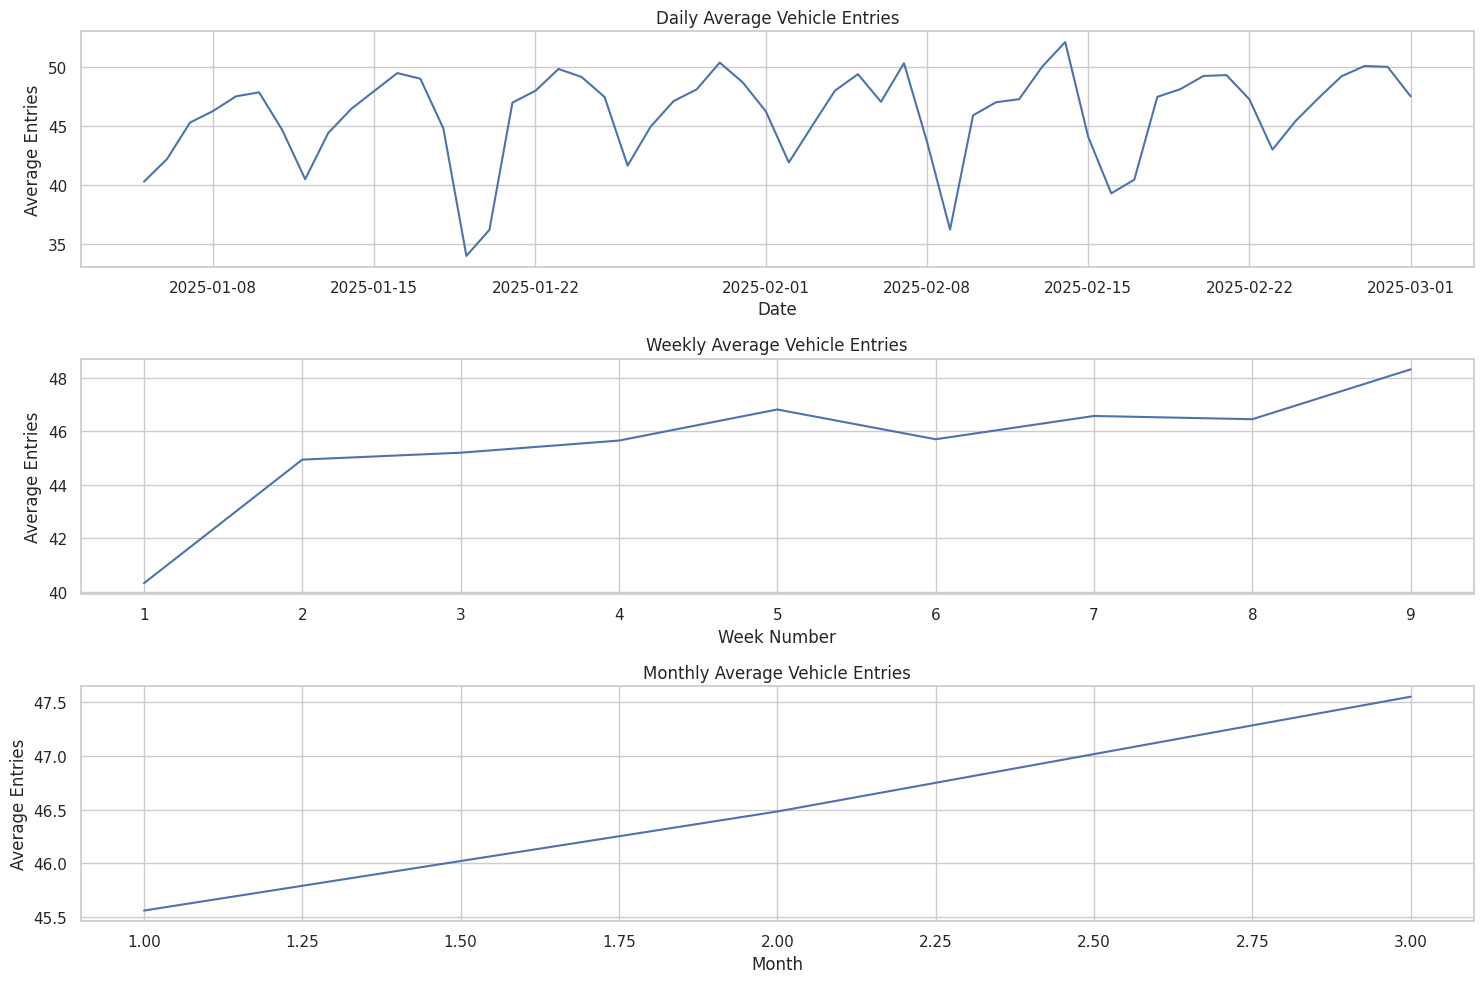

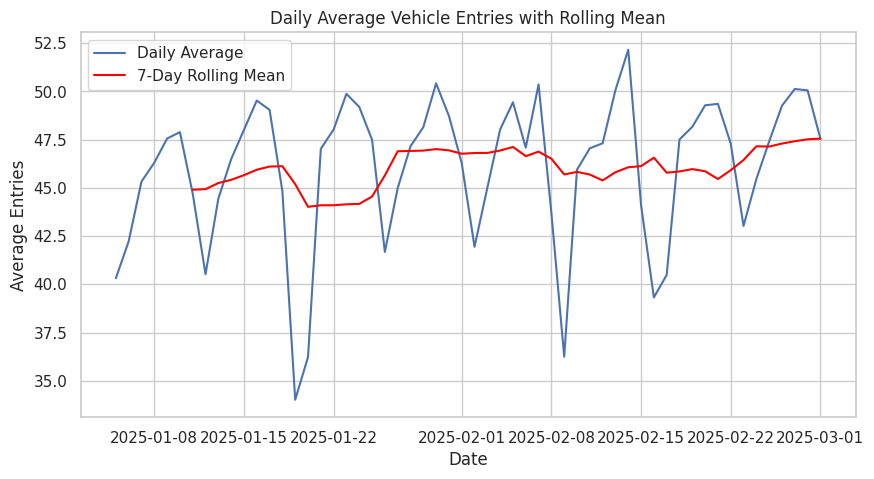

In [41]:
import matplotlib.pyplot as plt

# 1. Daily average
daily_avg = df.groupby('Toll Date')['CRZ Entries'].mean()

# 2. Weekly average
df['Week'] = df['Toll Date'].dt.isocalendar().week
weekly_avg = df.groupby('Week')['CRZ Entries'].mean()

# 3. Optional: Monthly average
df['Month'] = df['Toll Date'].dt.month
monthly_avg = df.groupby('Month')['CRZ Entries'].mean()

# 4. Plotting
plt.figure(figsize=(15, 10))

plt.subplot(3, 1, 1)
plt.plot(daily_avg.index, daily_avg.values)
plt.title('Daily Average Vehicle Entries')
plt.xlabel('Date')
plt.ylabel('Average Entries')

plt.subplot(3, 1, 2)
plt.plot(weekly_avg.index, weekly_avg.values)
plt.title('Weekly Average Vehicle Entries')
plt.xlabel('Week Number')
plt.ylabel('Average Entries')

plt.subplot(3, 1, 3)
plt.plot(monthly_avg.index, monthly_avg.values)
plt.title('Monthly Average Vehicle Entries')
plt.xlabel('Month')
plt.ylabel('Average Entries')

plt.tight_layout()
plt.show()

# 5. Rolling means (example for daily data)
daily_avg_rolling = daily_avg.rolling(window=7).mean()  # 7-day rolling mean

plt.figure(figsize=(10, 5))
plt.plot(daily_avg.index, daily_avg.values, label='Daily Average')
plt.plot(daily_avg_rolling.index, daily_avg_rolling.values, label='7-Day Rolling Mean', color='red')
plt.title('Daily Average Vehicle Entries with Rolling Mean')
plt.xlabel('Date')
plt.ylabel('Average Entries')
plt.legend()
plt.show()

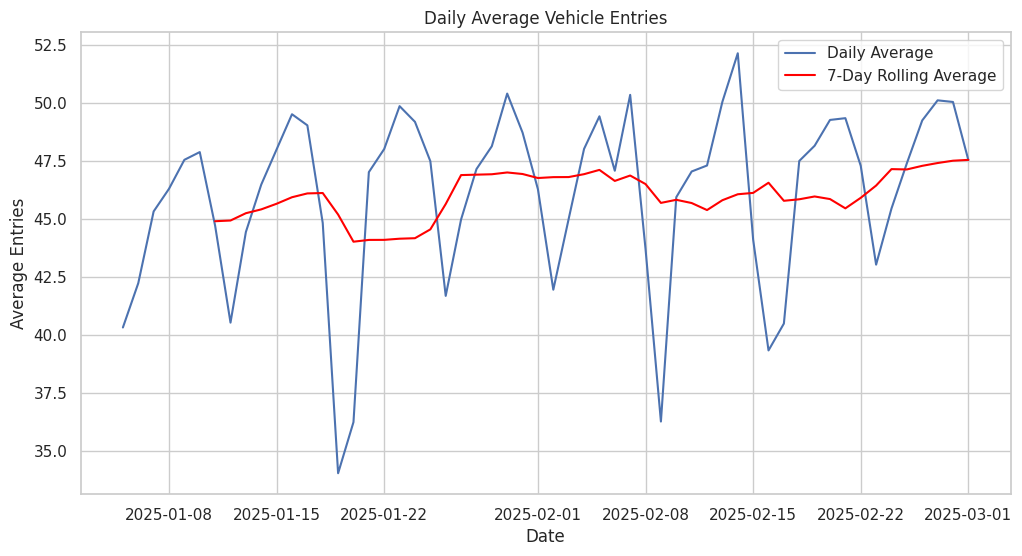

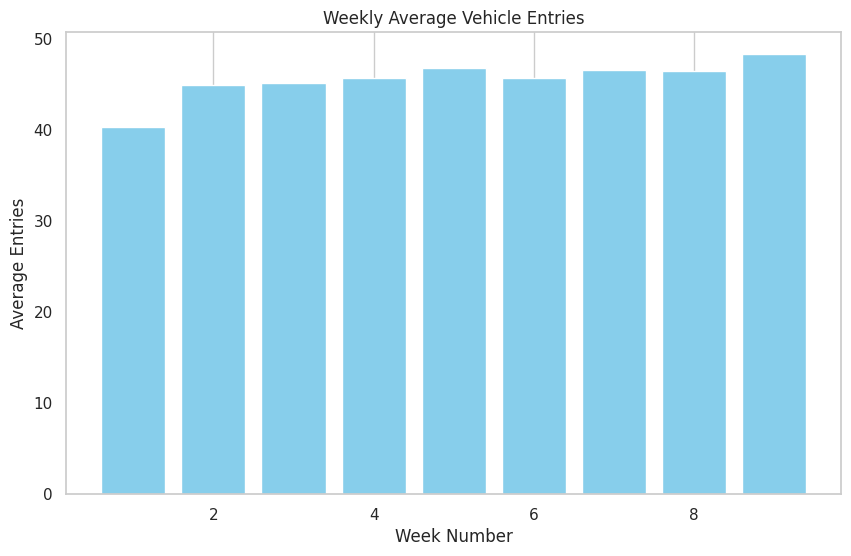

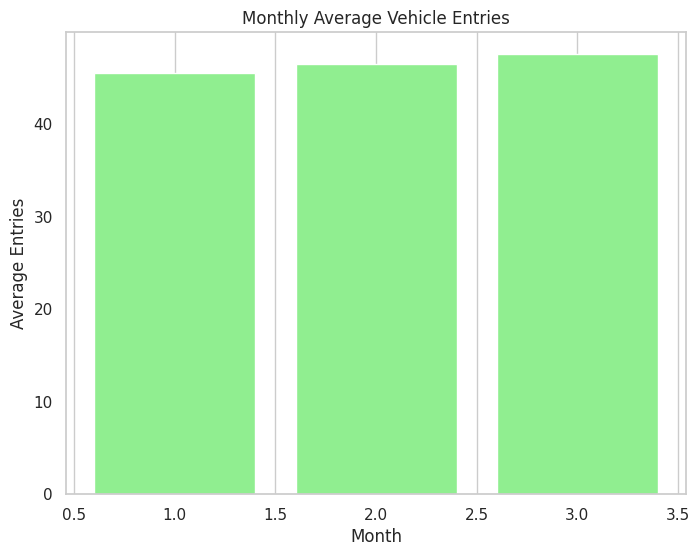

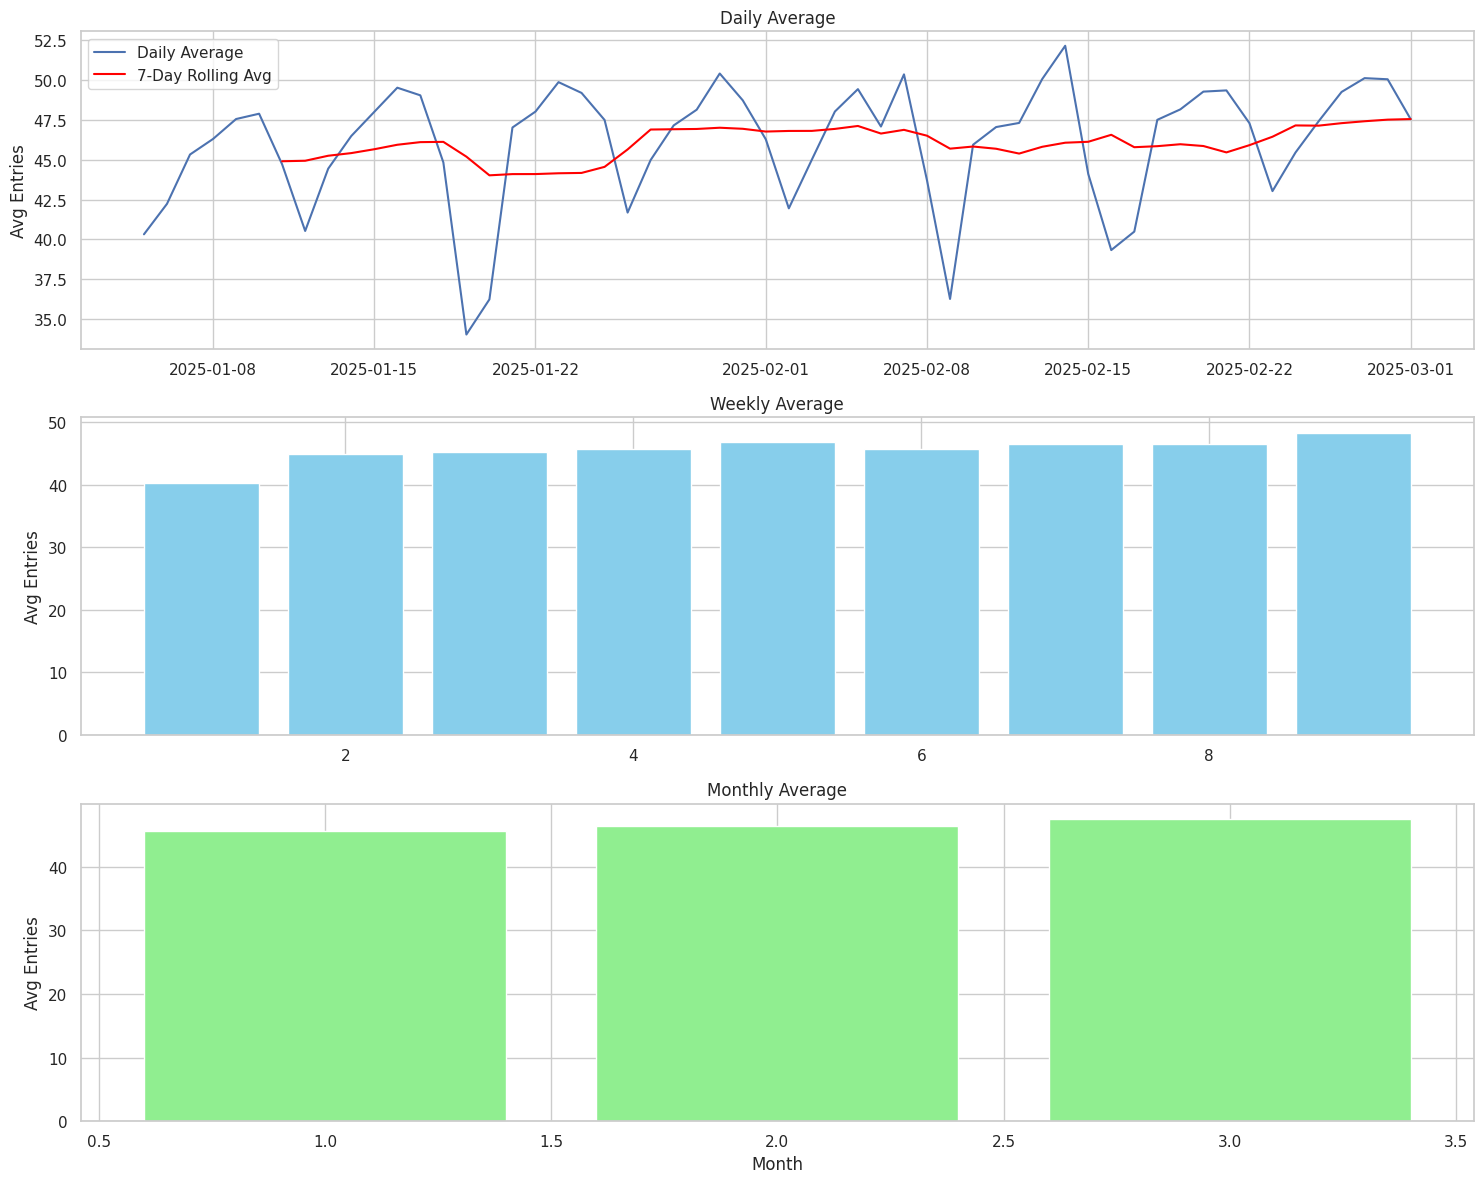

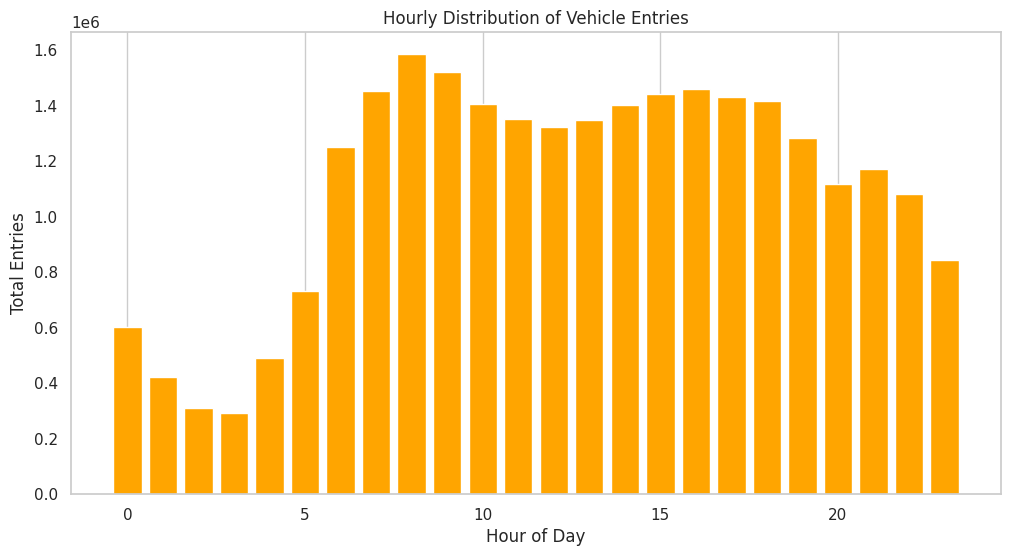

In [42]:
import matplotlib.pyplot as plt

# 1. Daily Trends
plt.figure(figsize=(12, 6))
plt.plot(daily_avg.index, daily_avg.values, label='Daily Average')
plt.plot(daily_avg_rolling.index, daily_avg_rolling.values, label='7-Day Rolling Average', color='red')
plt.title('Daily Average Vehicle Entries')
plt.xlabel('Date')
plt.ylabel('Average Entries')
plt.legend()
plt.grid(True)
plt.show()


# 2. Weekly Trends
plt.figure(figsize=(10, 6))
plt.bar(weekly_avg.index, weekly_avg.values, color='skyblue')
plt.title('Weekly Average Vehicle Entries')
plt.xlabel('Week Number')
plt.ylabel('Average Entries')
plt.grid(axis='y')
plt.show()


# 3. Monthly Trends
plt.figure(figsize=(8, 6))
plt.bar(monthly_avg.index, monthly_avg.values, color='lightgreen')
plt.title('Monthly Average Vehicle Entries')
plt.xlabel('Month')
plt.ylabel('Average Entries')
plt.grid(axis='y')
plt.show()


# 4. Combined Visualization
plt.figure(figsize=(15, 12))

plt.subplot(3, 1, 1)
plt.plot(daily_avg.index, daily_avg.values, label='Daily Average')
plt.plot(daily_avg_rolling.index, daily_avg_rolling.values, label='7-Day Rolling Avg', color='red')
plt.title('Daily Average')
plt.ylabel('Avg Entries')
plt.legend()

plt.subplot(3, 1, 2)
plt.bar(weekly_avg.index, weekly_avg.values, color='skyblue')
plt.title('Weekly Average')
plt.ylabel('Avg Entries')

plt.subplot(3, 1, 3)
plt.bar(monthly_avg.index, monthly_avg.values, color='lightgreen')
plt.title('Monthly Average')
plt.xlabel('Month')
plt.ylabel('Avg Entries')


plt.tight_layout()
plt.show()


# 5. Hourly Distribution
hourly_entries = df.groupby('Hour of Day')['CRZ Entries'].sum()
plt.figure(figsize=(12,6))
plt.bar(hourly_entries.index, hourly_entries.values, color='orange')
plt.title('Hourly Distribution of Vehicle Entries')
plt.xlabel('Hour of Day')
plt.ylabel('Total Entries')
plt.grid(axis='y')
plt.show()

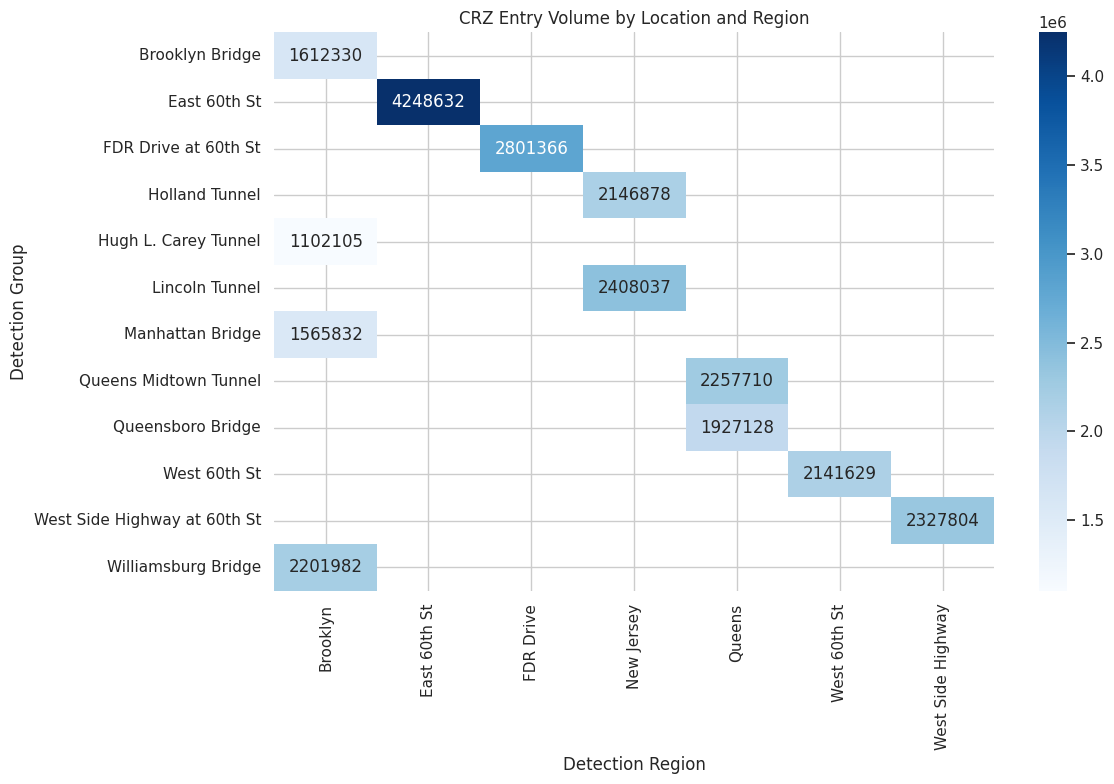

In [43]:

import seaborn as sns# Cross-tabulate entry points and regions
entry_analysis = pd.crosstab(
    index=df['Detection Group'],
    columns=df['Detection Region'],
    values=df['CRZ Entries'],
    aggfunc='sum'
)

# Heatmap visualization
plt.figure(figsize=(12,8))
sns.heatmap(entry_analysis, cmap="Blues", annot=True, fmt=".0f")
plt.title('CRZ Entry Volume by Location and Region')
plt.tight_layout()

 CRZ Entries by Vehicle Class Over Hours:

This multi-line plot displays how different vehicle classes contribute to total CRZ entries throughout each hour of the day.

What This Plot Reveals:

Class 1 (Cars, Pickups, Vans) show the most pronounced morning and evening peaks, reflecting work commuters and general drivers.

Taxis/FHVs often peak later in the day, especially during evenings, which aligns with their role in nightlife and tourism transport.

Truck classes typically peak early in the morning (around 6–8 AM), likely due to delivery schedules and commercial access windows.

Motorcycles and buses show smaller, flatter patterns—less consistent but still contributing to CRZ traffic.

This visualization provides insight into how different vehicle types use the city at different times, supporting data-driven decisions for congestion pricing, delivery scheduling, and infrastructure planning.



<ipython-input-44-71c718d1e73d>:32: UserWarning:

Glyph 128663 (\N{AUTOMOBILE}) missing from font(s) DejaVu Sans.



<Figure size 1400x700 with 0 Axes>

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128663 (\N{AUTOMOBILE}) missing from font(s) DejaVu Sans.



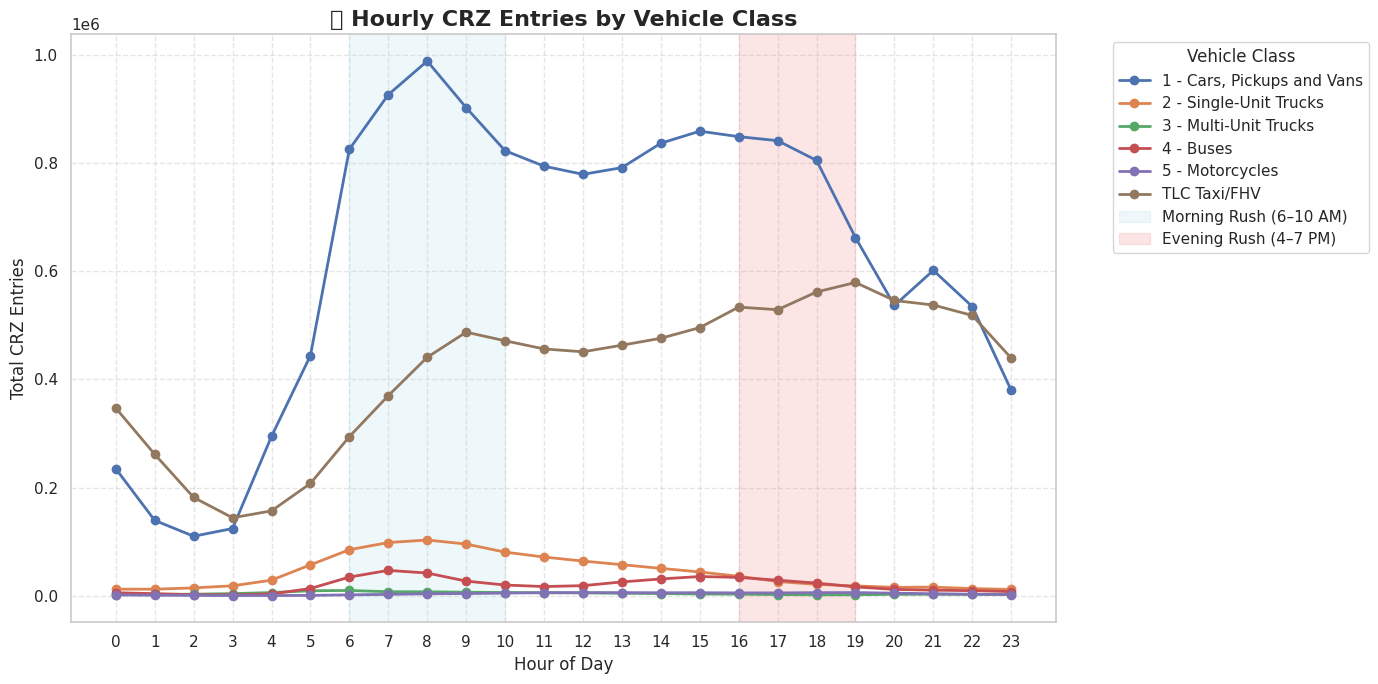

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare pivot table
pivot_vc = df.pivot_table(
    index='Hour of Day',
    columns='Vehicle Class',
    values='CRZ Entries',
    aggfunc='sum'
)

# Set style
sns.set_theme(style="whitegrid")

# Plot setup
plt.figure(figsize=(14, 7))
ax = pivot_vc.plot(marker='o', linewidth=2, figsize=(14, 7))

# Highlight rush hours
plt.axvspan(6, 10, color='lightblue', alpha=0.2, label='Morning Rush (6–10 AM)')
plt.axvspan(16, 19, color='lightcoral', alpha=0.2, label='Evening Rush (4–7 PM)')

# Add titles and labels
plt.title("🚗 Hourly CRZ Entries by Vehicle Class", fontsize=16, weight='bold')
plt.xlabel("Hour of Day", fontsize=12)
plt.ylabel("Total CRZ Entries", fontsize=12)
plt.xticks(range(0, 24))
plt.grid(True, linestyle='--', alpha=0.5)

# Place legend outside the plot
plt.legend(title='Vehicle Class', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show plot
plt.show()


Hourly CRZ Entries in Top 5 Detection Regions:

This line plot tracks the hourly CRZ entry trends for the top 5 most active detection regions, allowing us to compare congestion timing across key entry points into Manhattan.

What the Plot Reveals:
Each region has a unique congestion pattern depending on its geography and usage:

Lincoln Tunnel and Queens Midtown Tunnel typically show strong morning peaks (7–9 AM) due to commuter traffic from New Jersey and Queens.

East 60th St and FDR Drive might reflect local cross-town or delivery-based traffic, with multiple minor peaks.

Bridges may show slightly broader peaks, reflecting mixed usage (commuters + tourists + trucks).

By comparing curves, we can see which regions are synchronized with peak office hours, and which have less conventional traffic flow.

This visualization is excellent for identifying which entry points are most strained during rush hours and can inform targeted congestion pricing or policy interventions.

<ipython-input-45-9cb20cce1ba7>:34: UserWarning:

Glyph 128205 (\N{ROUND PUSHPIN}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128205 (\N{ROUND PUSHPIN}) missing from font(s) DejaVu Sans.



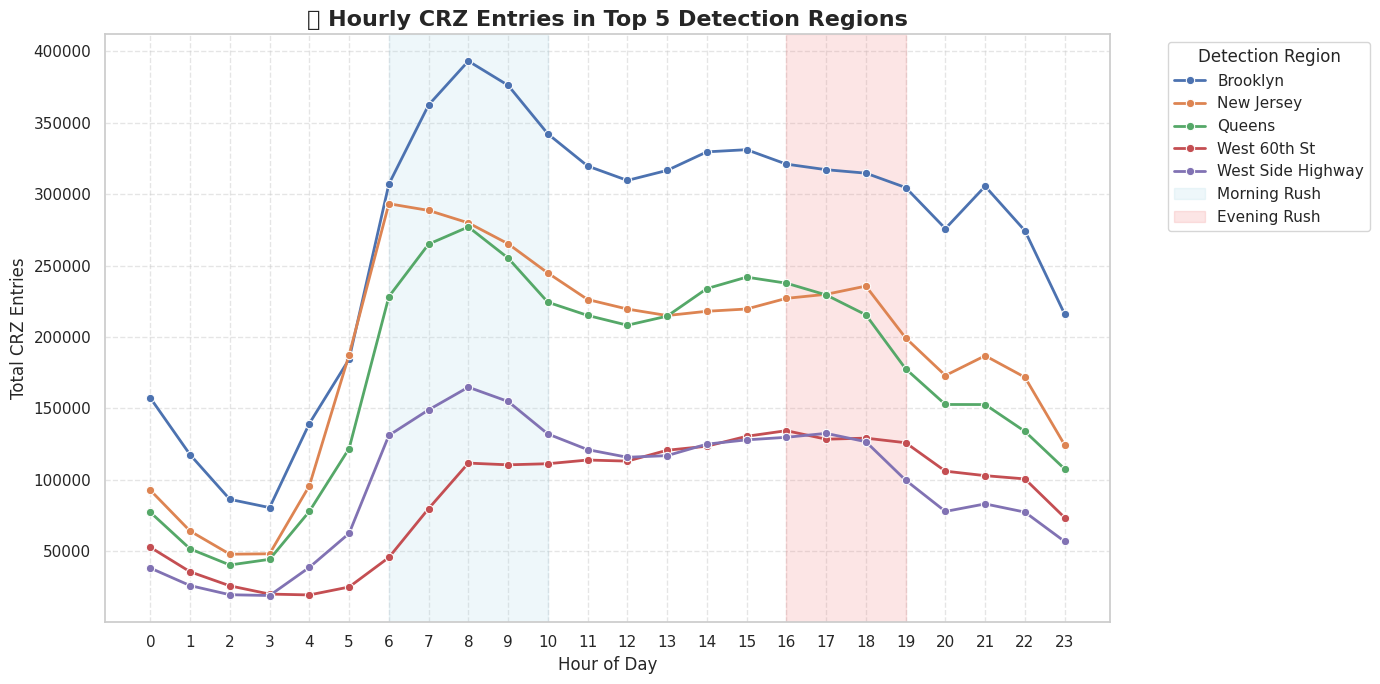

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group and filter top 5 detection regions
top_hour_region = df.groupby(['Detection Region', 'Hour of Day'])['CRZ Entries'].sum().reset_index()
top_regions = df['Detection Region'].value_counts().nlargest(5).index
top_hour_region = top_hour_region[top_hour_region['Detection Region'].isin(top_regions)]

# Set style
sns.set_theme(style="whitegrid")

# Plot
plt.figure(figsize=(14, 7))
sns.lineplot(
    data=top_hour_region,
    x='Hour of Day',
    y='CRZ Entries',
    hue='Detection Region',
    marker='o',
    linewidth=2
)

# Annotate rush hours
plt.axvspan(6, 10, color='lightblue', alpha=0.2, label='Morning Rush')
plt.axvspan(16, 19, color='lightcoral', alpha=0.2, label='Evening Rush')

# Titles and labels
plt.title('📍 Hourly CRZ Entries in Top 5 Detection Regions', fontsize=16, weight='bold')
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Total CRZ Entries', fontsize=12)
plt.xticks(range(0, 24))
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Detection Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show
plt.show()



Daily Trend of Total CRZ Entries Over Time:

This line plot shows the daily total number of vehicles entering the Congestion Relief Zone (CRZ) throughout the observed time period.

What This Plot Reveals:

Weekday Cycles:
You may observe repeating weekday peaks and weekend dips, consistent with work commute behavior.

Trend Shifts:
Look for any gradual increases or decreases in traffic over time — which could signal behavioral adaptation to the tolling policy.

Anomalies or Spikes:
Sudden drops or peaks may correspond to holidays, events, or inclement weather.

This visualization gives a high-level understanding of how traffic patterns evolve day-by-day and is great for assessing the early impact of the congestion pricing rollout.

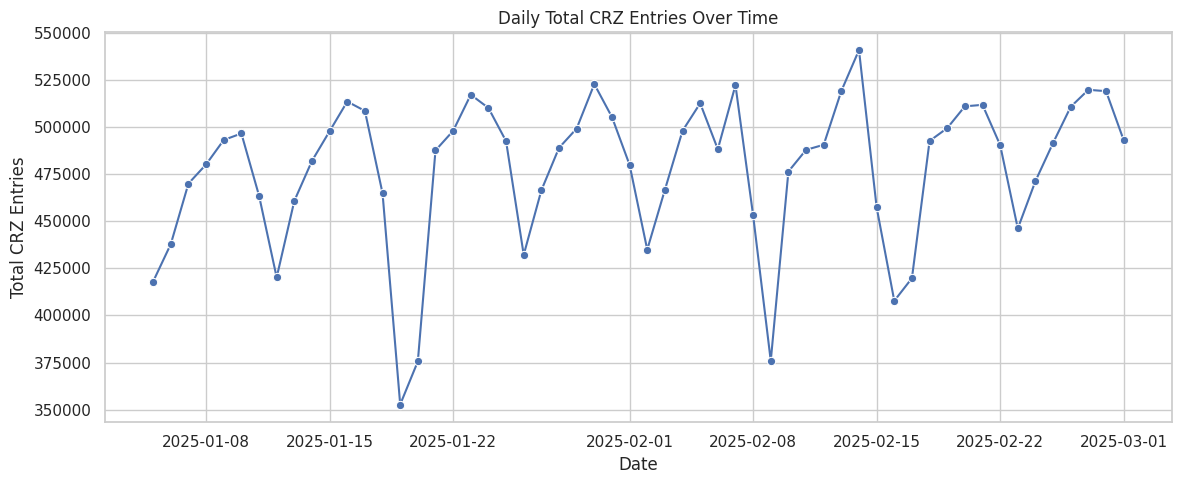

In [47]:
# Total CRZ Entries Over Time (Daily Trend)
daily_trend = df.groupby('Toll Date')['CRZ Entries'].sum().reset_index()
plt.figure(figsize=(12, 5))
sns.lineplot(data=daily_trend, x='Toll Date', y='CRZ Entries', marker='o')
plt.title('Daily Total CRZ Entries Over Time')
plt.xlabel('Date')
plt.ylabel('Total CRZ Entries')
plt.grid(True)
plt.tight_layout()
plt.show()


 CRZ vs Excluded Roadway Entry Ratio by Detection Region:

This bar plot highlights the top 10 detection regions where a higher percentage of vehicles use Excluded Roadways (non-toll areas like FDR Drive and West Side Highway) instead of entering the Congestion Relief Zone (CRZ).

Key Insights:
These regions may be strategically used to avoid tolls, especially where access to Excluded Roadways is convenient.

For example, Brooklyn Bridge or West Side Highway are common access points to highways exempt from tolling.

Regions with a high excluded ratio might see higher traffic flow but reduced toll revenue.

This analysis helps transportation planners understand toll avoidance patterns and identify where more signage, enforcement, or tolling revisions may be needed.

<ipython-input-48-ac878e9f0fea>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




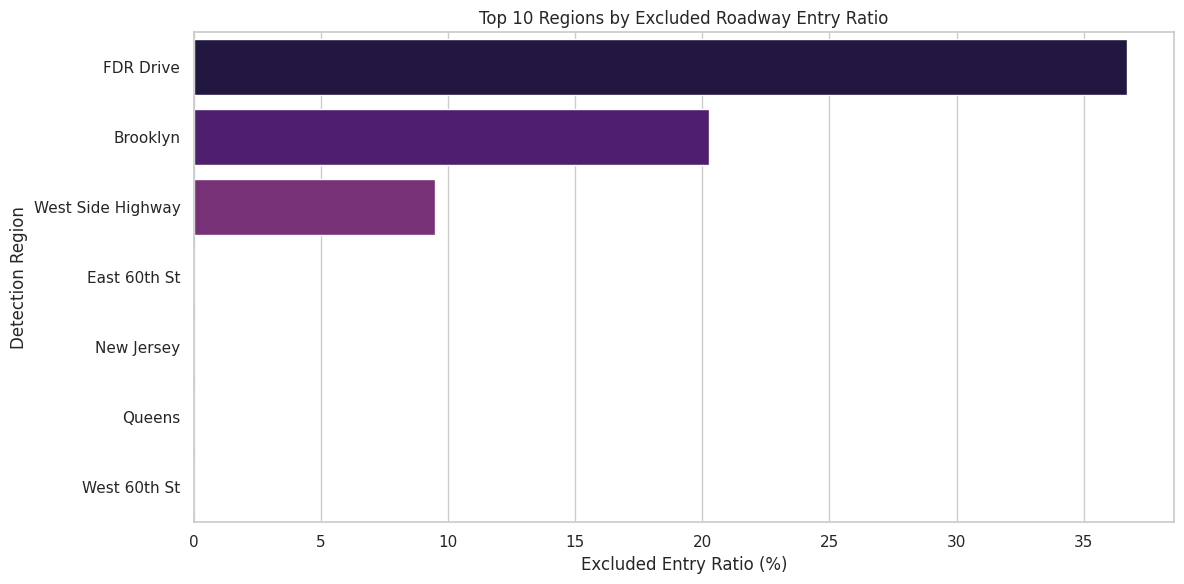

In [48]:
# CRZ vs. Excluded Ratio by Region
region_stats = df.groupby('Detection Region')[['CRZ Entries', 'Excluded Roadway Entries']].sum()
region_stats['Excluded Ratio (%)'] = 100 * region_stats['Excluded Roadway Entries'] / (region_stats['CRZ Entries'] + region_stats['Excluded Roadway Entries'])
region_stats = region_stats.sort_values('Excluded Ratio (%)', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=region_stats['Excluded Ratio (%)'].head(10), y=region_stats.head(10).index, palette='magma')
plt.title('Top 10 Regions by Excluded Roadway Entry Ratio')
plt.xlabel('Excluded Entry Ratio (%)')
plt.ylabel('Detection Region')
plt.tight_layout()
plt.show()


Share of Traffic by Vehicle Class:

This pie chart visualizes the percentage share of each vehicle class in the total traffic entering the Congestion Relief Zone (CRZ).

Key Insights:
Class 1 Vehicles (Cars, Pickups, and Vans) typically dominate the chart, reflecting everyday personal commuting.

TLC Taxis/FHVs often form the second-largest segment, crucial in NYC’s transportation ecosystem.

Truck and Bus categories represent smaller proportions but have a high spatial and policy impact due to their size and emissions.

Helps understand traffic composition, which is critical for toll policy, infrastructure planning, and environmental assessments.

This overview provides a high-level understanding of who is using the CRZ and can guide decisions on vehicle-specific tolls or incentives.

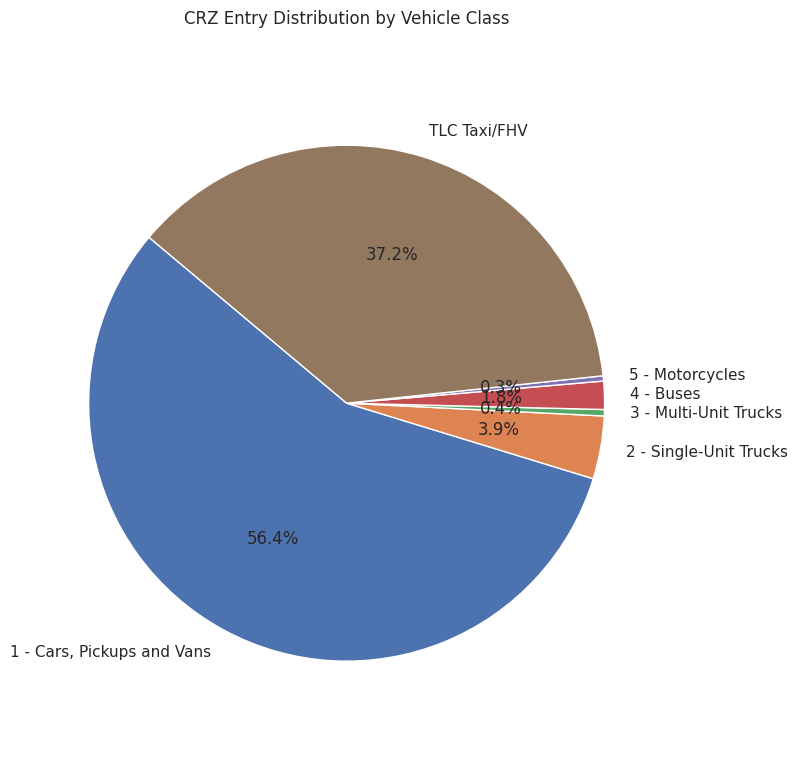

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Assuming your DataFrame is named 'df'

# Group by Vehicle Class and sum CRZ Entries
vehicle_class_entries = df.groupby('Vehicle Class')['CRZ Entries'].sum().reset_index()

# Set Seaborn style
sns.set(style="whitegrid")

# Matplotlib Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(vehicle_class_entries['CRZ Entries'],
        labels=vehicle_class_entries['Vehicle Class'],
        autopct='%1.1f%%',
        startangle=140)
plt.title('CRZ Entry Distribution by Vehicle Class')
plt.axis('equal')
plt.tight_layout()
plt.show()

# Plotly Interactive Pie Chart with highlight
fig = px.pie(vehicle_class_entries,
             values='CRZ Entries',
             names='Vehicle Class',
             title='Interactive CRZ Entry Distribution by Vehicle Class',
             hole=0.3)
fig.update_traces(textposition='inside', textinfo='percent+label', pull=[0.05]*len(vehicle_class_entries))
fig.show()


Top 10 Congested Bridges and Tunnels:

This bar plot shows the top 10 most congested entry points into the Congestion Relief Zone (CRZ) that are specifically Bridges and Tunnels.

Key Takeaways:
Lincoln Tunnel, Queens Midtown Tunnel, and Brooklyn Bridge typically rank at the top — major commuter arteries connecting Manhattan with NJ and outer boroughs.

Reflects both personal and commercial traffic patterns into the city.

Useful for congestion pricing decisions, traffic control planning, and prioritizing infrastructure maintenance.

This chart helps isolate structurally critical entry points where traffic bottlenecks are most intense and should be a focus for policy intervention or engineering improvement.

<ipython-input-50-ce82329eb577>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




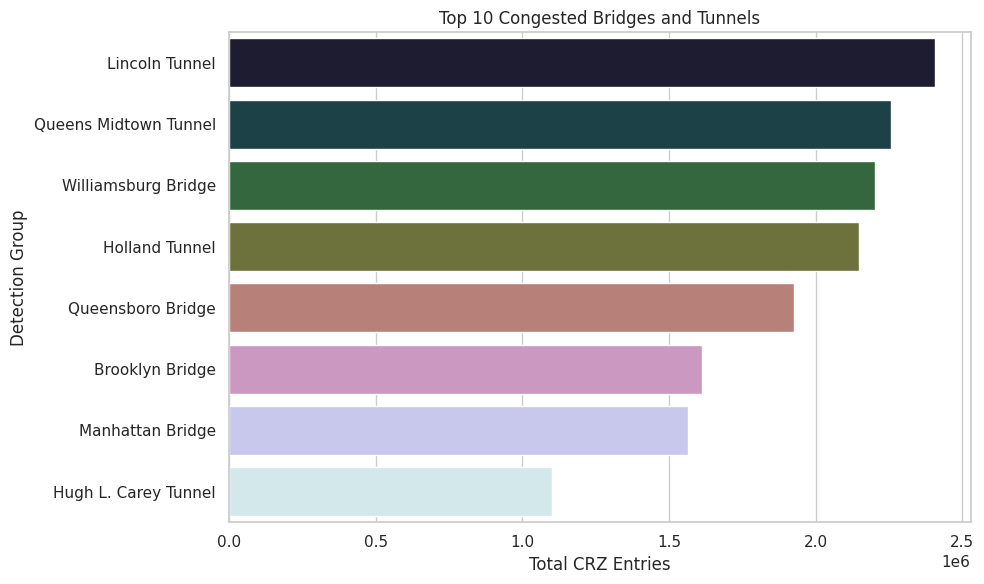

In [50]:
# Top Congestion Points (Bridges/Tunnels)
bridge_keywords = ['Bridge', 'Tunnel']
df_bridges = df[df['Detection Group'].str.contains('|'.join(bridge_keywords), na=False)]
bridge_congestion = df_bridges.groupby('Detection Group')['CRZ Entries'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=bridge_congestion.values, y=bridge_congestion.index, palette='cubehelix')
plt.title('Top 10 Congested Bridges and Tunnels')
plt.xlabel('Total CRZ Entries')
plt.ylabel('Detection Group')
plt.tight_layout()
plt.show()

CRZ Entries Over Time by Vehicle Class:

This line plot visualizes how the volume of vehicle entries into the Congestion Relief Zone (CRZ) has changed over time, broken down by vehicle class.

Key Insights:
Class 1 Vehicles (Cars, Pickups, Vans) typically show the highest and most stable entry rates.

TLC Taxis/FHVs have a visible evening and weekend presence, often peaking at different times than private vehicles.

Trucks and buses might show peaks tied to delivery schedules or weekday transit demand.

Observing daily fluctuations helps understand the effect of commuter routines, events, or policy shifts.

This plot helps city officials, planners, and researchers evaluate temporal usage patterns by vehicle type and assess how traffic regulations affect different user groups.

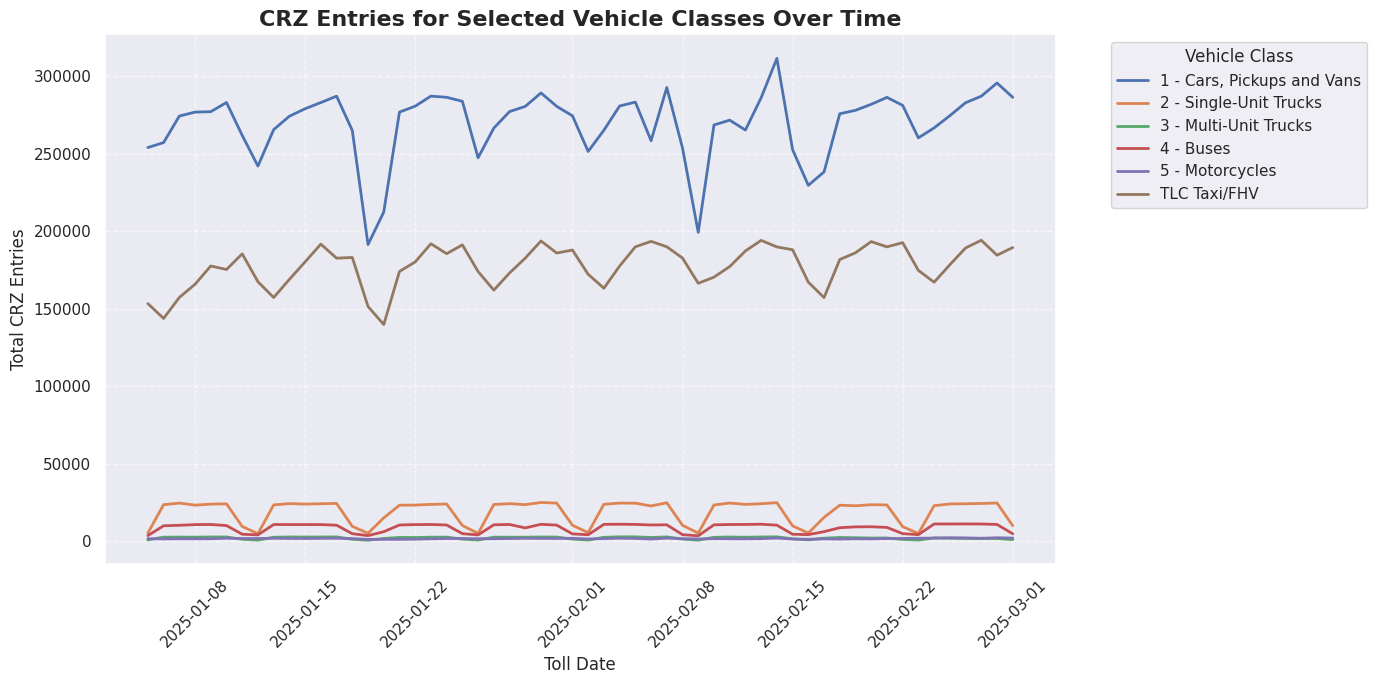

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Pivot the data
df_pivot = df.groupby(['Toll Date', 'Vehicle Class'])['CRZ Entries'].sum().unstack(fill_value=0).reset_index()

# Define the vehicle classes you want to track
vehicle_classes = [
    "1 - Cars, Pickups and Vans",
    "2 - Single-Unit Trucks",
    "3 - Multi-Unit Trucks",
    "4 - Buses",
    "5 - Motorcycles",
    "TLC Taxi/FHV"
]

# Set the visualization style
sns.set_theme(style="darkgrid")

# Create the line plot
plt.figure(figsize=(14, 7))

for vehicle_class in vehicle_classes:
    if vehicle_class in df_pivot.columns:
        plt.plot(df_pivot['Toll Date'], df_pivot[vehicle_class], label=vehicle_class, linewidth=2)

# Customize the plot
plt.title("CRZ Entries for Selected Vehicle Classes Over Time", fontsize=16, fontweight='bold')
plt.xlabel("Toll Date", fontsize=12)
plt.ylabel("Total CRZ Entries", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Vehicle Class", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

# Show the plot
plt.show()


Proportion of Peak vs Overnight Time by Hour of Day:

This bar plot shows the proportion of CRZ activity occurring during peak hours (coded as 1) versus overnight hours (0) for each hour of the day.

Why This Is Useful:
Helps identify which hours are most consistently toll-enforced (Peak hours).

Supports policy adjustment, like defining toll windows or observing behavioral shifts due to congestion pricing.

Key Takeaways:

Hours 5 AM – 9 PM likely show high proportions of 1, aligning with NYC's peak tolling schedule.

Hours like 4–5 AM and 9–10 PM may show transitional or mixed behavior, indicating boundaries of enforcement periods.

Overnight hours (e.g., 12 AM – 4 AM) remain entirely untolled.

This visual offers a simple yet effective way to validate time enforcement and public compliance with congestion toll policies.

<ipython-input-53-377b671dd7e5>:20: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




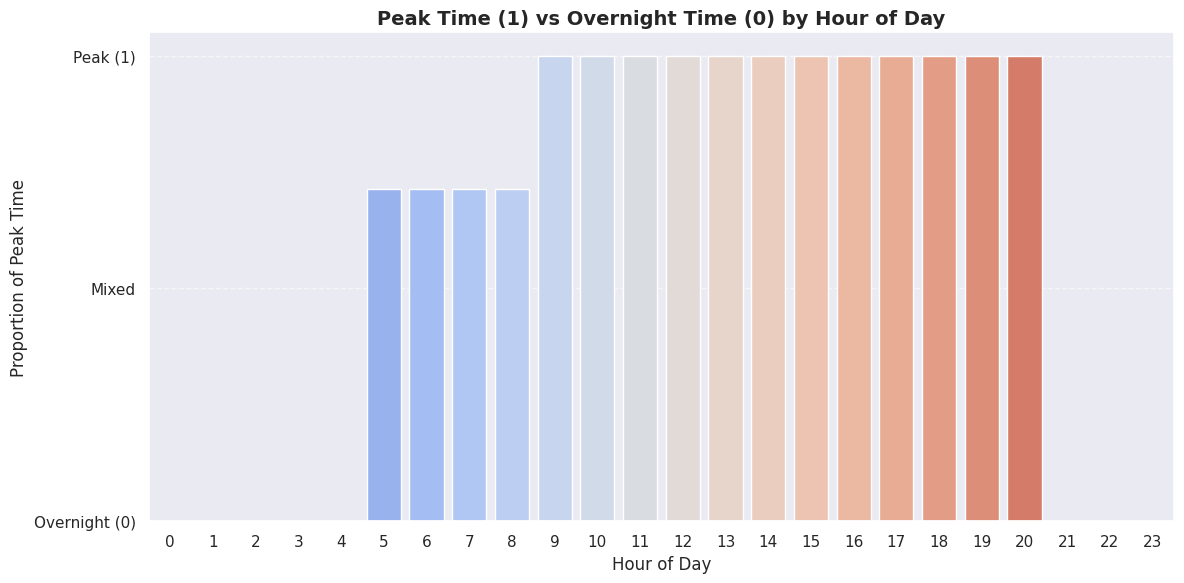

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a working copy with relevant columns
df_copy = df[['Hour of Day', 'Time Period']].copy()

# Handle missing values and convert types
df_copy['Time Period'] = df_copy['Time Period'].astype(str).fillna('Unknown')
df_copy['Hour of Day'] = pd.to_numeric(df_copy['Hour of Day'], errors='coerce')

# Convert 'Time Period' to binary: Peak = 1, Overnight = 0
df_copy['Time Period Binary'] = df_copy['Time Period'].apply(lambda x: 1 if 'peak' in x.lower() else 0)

# Group by Hour of Day and calculate the average binary value
df_grouped = df_copy.groupby('Hour of Day', as_index=False)['Time Period Binary'].mean()

# Plot the chart
plt.figure(figsize=(12, 6))
sns.barplot(x='Hour of Day', y='Time Period Binary', data=df_grouped, palette='coolwarm', errorbar=None)

# Customize plot
plt.title('Peak Time (1) vs Overnight Time (0) by Hour of Day', fontsize=14, fontweight='bold')
plt.xlabel('Hour of Day')
plt.ylabel('Proportion of Peak Time')
plt.xticks(range(0, 24))
plt.yticks([0, 0.5, 1], ['Overnight (0)', 'Mixed', 'Peak (1)'])
plt.grid(axis='y', linestyle="--", alpha=0.6)
plt.tight_layout()

# Show plot
plt.show()


Hourly Car Entries on Brooklyn Bridge (March 1, 2025):

This line plot analyzes the traffic pattern of Class 1 vehicles (Cars, Pickups, and Vans) crossing the Brooklyn Bridge on a single day: March 1, 2025.

Key Insights:

Morning Hours (6 AM – 9 AM) may show a spike in CRZ entries, consistent with commuter travel.

Excluded Roadway spikes at specific hours may indicate toll avoidance via FDR or West Side Highway.

The "Difference" line highlights hours with the largest route divergence — useful for congestion or toll impact analysis.

Evening hours (4 PM – 7 PM) can reflect return commute or leisure travel back out of the city.

This kind of hour-by-hour, location-specific analysis is powerful for understanding real-world behavior under congestion pricing and how specific entry points are used dynamically throughout the day.

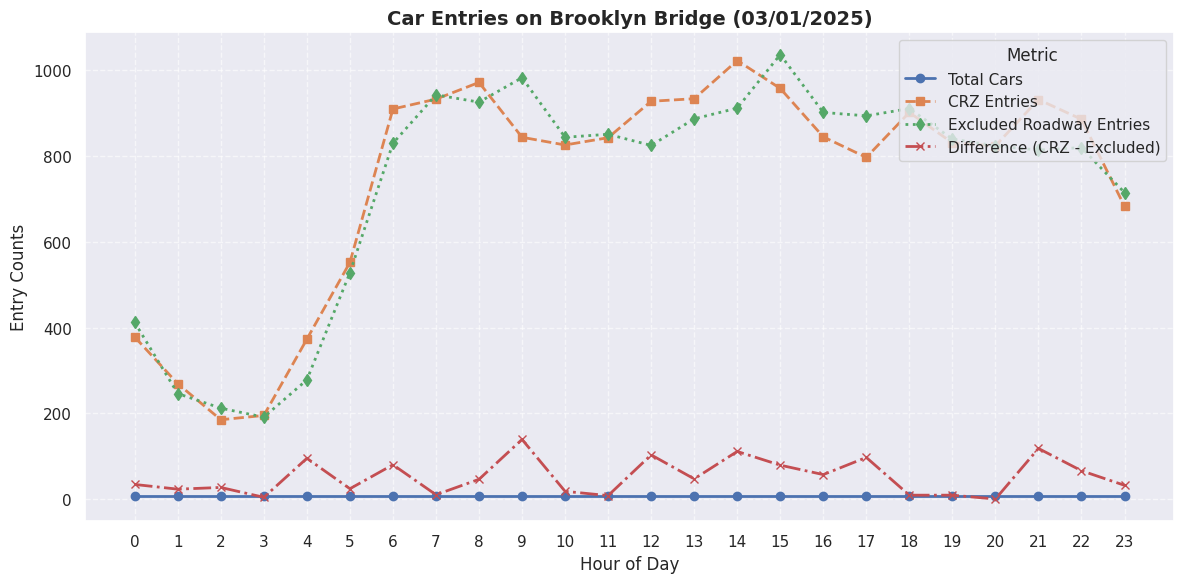

In [54]:
import matplotlib.pyplot as plt
import pandas as pd

# Filter for Brooklyn Bridge and a specific date
single_day = df[df['Toll Date'] == pd.to_datetime('2025-03-01')]
single_day_brooklyn_bridge = single_day[single_day['Detection Group'].str.contains("Brooklyn Bridge", case=False, na=False)]
single_day_brooklyn_bridge_cars = single_day_brooklyn_bridge[single_day_brooklyn_bridge['Vehicle Class'] == "1 - Cars, Pickups and Vans"]

# Plot if data is available
if not single_day_brooklyn_bridge_cars.empty:
    plt.figure(figsize=(12, 6))

    # Group by hour
    car_counts = single_day_brooklyn_bridge_cars.groupby("Hour of Day").size()
    crz_entries = single_day_brooklyn_bridge_cars.groupby("Hour of Day")["CRZ Entries"].sum()
    excluded_entries = single_day_brooklyn_bridge_cars.groupby("Hour of Day")["Excluded Roadway Entries"].sum()
    difference_entries = (crz_entries - excluded_entries).abs()

    # Plot total cars
    plt.plot(car_counts.index, car_counts.values, marker="o", linestyle="-", label="Total Cars", linewidth=2)

    # Plot CRZ Entries
    plt.plot(crz_entries.index, crz_entries.values, marker="s", linestyle="--", label="CRZ Entries", linewidth=2)

    # Plot Excluded Roadway Entries
    plt.plot(excluded_entries.index, excluded_entries.values, marker="d", linestyle=":", label="Excluded Roadway Entries", linewidth=2)

    # Plot difference
    plt.plot(difference_entries.index, difference_entries.values, marker="x", linestyle="-.", label="Difference (CRZ - Excluded)", linewidth=2)

    # Customize the plot
    plt.xlabel("Hour of Day", fontsize=12)
    plt.ylabel("Entry Counts", fontsize=12)
    plt.title("Car Entries on Brooklyn Bridge (03/01/2025)", fontsize=14, fontweight='bold')
    plt.legend(title="Metric", loc='upper right')
    plt.xticks(range(0, 24))
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.tight_layout()

    # Show plot
    plt.show()
else:
    print("No data available for Brooklyn Bridge cars on 03/01/2025.")


In [62]:
import pandas as pd
import plotly.graph_objects as go

# Assuming your DataFrame is named 'df'

# Define the time slots and vehicle classes
time_slots = [
    {'day': 'All', 'hour': 8},  # 8 AM every day
    {'day': 'Friday', 'hour': 18},  # Friday 6 PM
    {'day': 'Tuesday', 'hour': 17}  # Tuesday 5 PM
]
vehicle_classes = ['TLC Taxi/FHV', '1 - Cars, Pickups and Vans']

# Iterate through time slots
for time_slot in time_slots:
    # Filter and group data for both vehicle classes
    fhv_data = df[
        (df['Hour of Day'] == time_slot['hour']) &
        (df['Vehicle Class'] == vehicle_classes[0])  # FHV
    ]
    cars_data = df[
        (df['Hour of Day'] == time_slot['hour']) &
        (df['Vehicle Class'] == vehicle_classes[1])  # Cars, Pickups, and Vans
    ]

    if time_slot['day'] != 'All':
        fhv_data = fhv_data[fhv_data['Day of Week'] == time_slot['day']]
        cars_data = cars_data[cars_data['Day of Week'] == time_slot['day']]

    fhv_grouped = fhv_data.groupby(['Detection Region', 'Detection Group'])['CRZ Entries'].sum().reset_index()
    cars_grouped = cars_data.groupby(['Detection Region', 'Detection Group'])['CRZ Entries'].sum().reset_index()

    # Merge data for stacked bar chart
    merged_data = pd.merge(fhv_grouped, cars_grouped, on=['Detection Region', 'Detection Group'], how='outer', suffixes=('_fhv', '_cars'))
    merged_data = merged_data.fillna(0)  # Fill NaN with 0 for missing values

    # Create stacked bar chart using Plotly
    fig = go.Figure(data=[
        go.Bar(name='FHV', x=merged_data['Detection Group'], y=merged_data['CRZ Entries_fhv']),
        go.Bar(name='Cars, Pickups, and Vans', x=merged_data['Detection Group'], y=merged_data['CRZ Entries_cars'])
    ])

    fig.update_layout(barmode='stack',
                      title_text=f"Vehicle Entries at {time_slot['hour']}:00 on {time_slot['day']}",
                      xaxis_title="Detection Group",
                      yaxis_title="CRZ Entries",
                      xaxis_tickangle=-45)

    fig.show()

Final Insights & Conclusion

This exploratory data analysis project on the NYC Congestion Relief Zone (CRZ) traffic data reveals several important patterns, behavioral shifts, and implications for policy makers, commuters, and planners. The visualizations and breakdowns presented across time, location, and vehicle class bring out meaningful conclusions:

🔹 1. Peak Traffic Behavior
Morning commute hours (6 AM – 10 AM) show the highest CRZ entries, especially between Tuesday and Thursday, indicating a typical in-office workweek pattern.

A secondary peak is seen in the afternoon/evening (2:30 PM – 6 PM), corresponding to post-work movement.

Fridays exhibit a unique 6 PM spike, potentially tied to social outings, family plans, or weekend transitions.

🔹 2. Toll Avoidance Behavior

A significant portion of vehicles opt for Excluded Roadways like the FDR Drive and West Side Highway, particularly during peak tolling periods.

The CRZ vs. Excluded Entries ratio by region shows that some crossings (e.g., Brooklyn Bridge) are heavily used for toll avoidance.

Scatter plots confirm that Excluded Roadway entries increase when CRZ traffic is high, suggesting deliberate routing strategies to avoid tolls.

🔹 3. Bridge & Tunnel Congestion

Bridges and tunnels are the most frequently used detection points. The Lincoln Tunnel, Queens Midtown Tunnel, and East 60th St lead in total CRZ entries.

Hourly traffic patterns on these crossings reflect heavy morning influx, further supporting their role in daily commuting.

🔹 4. Vehicle Type Trends

Class 1 vehicles (Cars, Pickups, and Vans) dominate CRZ traffic (~57%), followed by TLC Taxis/FHVs (~36%).

Taxis and FHVs show late-night activity peaks, especially on Fridays and Saturdays, consistent with tourism and nightlife.

Trucks (Classes 2 & 3) peak in the early morning, tapering off later in the day—matching delivery and logistics schedules.

🔹 5. Heatmap Observations

Heatmaps confirm the highest traffic concentration between 6–9 AM on weekdays, and a spread-out but steady volume throughout Saturdays.

Sunday early mornings show unexpected elevated entries (12–5 AM), reflecting late-night city dynamics and nightlife return trips.

🔹 6. Region-Specific Insights

By mapping entries over time and location (e.g., Brooklyn Bridge - March 1, 2025), we observe how CRZ and Excluded flows vary hour-by-hour.

Visualization of top congested bridges/tunnels informs where infrastructure reinforcements or targeted policies (like dynamic tolling) might be most effective.

📌 Conclusion

The CRZ traffic data demonstrates how New Yorkers adjust their behavior in response to time-based tolling:

--Commuters shift schedules to avoid tolls.

--Excluded routes are tactically used during peak hours.

--Taxis, commercial vehicles, and weekend travelers each show distinct patterns.

These findings can guide:

--MTA and DOT decisions on optimizing toll pricing windows

--Traffic planning teams for managing high-congestion areas

--Sustainability goals, by encouraging low-emission or off-peak travel

With congestion pricing still in its early stages, ongoing monitoring and data transparency will be crucial in adapting strategies, improving urban mobility, and making data-driven decisions for a better NYC.